In [ ]:
#default_exp evaluation

# Evaluation

> evaluation of modelling results

In [ ]:
#export
from torchtools.core import *
from torchtools.data import *
from torchtools.models import *
from torchtools.datasets import *
from torchtools.augmentations import *
from torchtools.datablock import *
from torchtools.dataloader import *
from torchtools.experiments import *
from torchtools.configs import *

In [ ]:
#export
import pandas as pd
import numpy as np
from fastai2.basics import *
from datetime import datetime, timedelta

In [ ]:
#export
df_path = Path('./data/custom/bi_sample_anon.csv')
df_path = Path('./data/custom/bi_sample_pruned_anon.csv')
df_path = Path('~/coding/python/betting/experiments/datasets/bi_sample_pruned_anon.csv').expanduser()
df_path = Path('~/coding/python/betting/experiments/datasets/bi_sample_pruned_anon_222.csv').expanduser()
df_path = Path('~/coding/python/betlib/data/processed/ts_experiments_anon_ts_exp_2020818.csv').expanduser()
# df_path = Path('~/coding/python/betting/experiments/datasets/bi_50_218_anon.csv').expanduser()

In [ ]:
COL_CONFIG = 'config2.json'

In [ ]:
config_keys(COL_CONFIG)

['anon_10sl_4c_2d_1yml',
 'anon_10sl_6c_1yml',
 'anon_10sl_6c_1yhc',
 'anon_10sl_6c_2y',
 'anon_10sl_4c_2d_1yhc',
 'anon_10sl_4c_2d_2y',
 'anon_20sl_4c_2d_2y',
 'anon_30sl_4c_2d_2y',
 'anon_10sl_4c_2d_4tc_4cat_2y',
 'anon_10sl_4c_2d_4tc_4cat_1yhc',
 'anon_10sl_4c_1yhc',
 'anon_10sl_6c_1yclass',
 'anon_10sl_4c_2d_1yclass',
 'anon_10sl_4c_2d_4tc_4cat_1yclass',
 'tsexp_10sl_12c_1yhc',
 'tsexp_10sl_12c_1yclass']

### Evaluation

- get best hyperparameters
- evaluate ensembling

In [ ]:
## Evaluation of colab experiments/local eperiments and classification/regression
ISCOLAB = True
ISCLASSIFICATION = True

In [ ]:
## setup directories for results dataframe and safed predictions

BASE_DIR=Path('./') if not ISCOLAB else Path('~/google-drive').expanduser() # for colab
RESULTS_DIR=BASE_DIR/'experiments/results'
PREDS_DIR=BASE_DIR/'experiments/preds'
# RESULT_FN='results_script.csv'
if ISCOLAB:
#     RESULTS_FN='results_colab.csv' if not ISCLASSIFICATION else 'results_colab_classification.csv'
    RESULTS_FN='results_colab.csv' if not ISCLASSIFICATION else 'results_colab_class.csv'
else:
    RESULTS_FN='results_exploration.csv' if not ISCLASSIFICATION else 'results_exploration_class.csv'
    
##df_path = Path('~/coding/python/betting/experiments/datasets/bi_sample_pruned_anon.csv').expanduser()

In [ ]:
## read back base dataframe, needed for evaluation
df_results=pd.read_csv(BASE_DIR/RESULTS_DIR/RESULTS_FN)

In [ ]:
df_base = pd.read_csv(df_path)    

In [ ]:
## prune if necessary
df_base.drop(df_base[df_base['nf74']<=1].index, inplace=True)
df_base.reset_index(inplace=True, drop=True)

In [ ]:
augment_params = ['N', 'magnitude']
fitting_params = ['n_epochs', 'max_lr', 'wd', 'pct_start', 'div_factor']
#     metric_cols = [c for c in df.columns if 'metric_' in c and '_value' in c]
metric_cols = ['unweighted_profit_0_value', 'unweighted_profit_05_1_value']
metric_cols_classification = ['accuracy_0_value']

loss_cols = ['val_loss', 'trn_loss']
fn_cols=['val_preds', 'test_preds']#, 'model_fn']
experiment_cols = ['arch', 'bs', 'ds_id']
var_cols = ['Timestamp']

In [ ]:
df_results.Timestamp.head()

0    2020-08-24 08:48:21.277381
1    2020-08-24 08:49:44.886730
2    2020-08-24 08:50:50.625102
3    2020-08-24 08:51:56.012019
4    2020-08-24 08:53:01.811792
Name: Timestamp, dtype: object

In [ ]:
from datetime import datetime

In [ ]:
df_results.Timestamp=pd.to_datetime(df_results.Timestamp)

In [ ]:
df_results = df_results[df_results.Timestamp<datetime(2020,8,10)]

In [ ]:
df_results.shape

(14, 28)

In [ ]:
df_results.sort_values(by=metric_cols_classification[0], ascending=False)[
    metric_cols_classification+['bs']+fitting_params+augment_params+['seed', 'ds_id']]

,accuracy_0_value,bs,n_epochs,max_lr,wd,pct_start,div_factor,N,magnitude,seed,ds_id
0,0.40580,2048,10,0.001,0.1,0.3,25.0,2,0.3,1234,ts_experiments_anon_ts_exp_2020818_tsexp_10sl_12c_1yclass_160_185_210
3,0.40564,2048,10,0.001,0.1,0.3,25.0,2,0.3,543,ts_experiments_anon_ts_exp_2020818_tsexp_10sl_12c_1yclass_160_185_210
2,0.40552,2048,10,0.001,0.1,0.3,25.0,2,0.3,15,ts_experiments_anon_ts_exp_2020818_tsexp_10sl_12c_1yclass_160_185_210
8,0.40428,2048,10,0.030,0.1,0.3,25.0,2,0.3,13,ts_experiments_anon_ts_exp_2020818_tsexp_10sl_12c_1yclass_160_185_210
12,0.40420,2048,10,0.030,0.1,0.3,25.0,2,0.3,12345,ts_experiments_anon_ts_exp_2020818_tsexp_10sl_12c_1yclass_160_185_210
4,0.40332,2048,10,0.001,0.1,0.3,25.0,2,0.3,982,ts_experiments_anon_ts_exp_2020818_tsexp_10sl_12c_1yclass_160_185_210
7,0.40328,2048,10,0.030,0.1,0.3,25.0,2,0.3,1234,ts_experiments_anon_ts_exp_2020818_tsexp_10sl_12c_1yclass_160_185_210
9,0.40320,2048,10,0.030,0.1,0.3,25.0,2,0.3,15,ts_experiments_anon_ts_exp_2020818_tsexp_10sl_12c_1yclass_160_185_210
11,0.40304,2048,10,0.030,0.1,0.3,25.0,2,0.3,982,ts_experiments_anon_ts_exp_2020818_tsexp_10sl_12c_1yclass_160_185_210
1,0.40268,2048,10,0.001,0.1,0.3,25.0,2,0.3,13,ts_experiments_anon_ts_exp_2020818_tsexp_10sl_12c_1yclass_160_185_210


In [ ]:
exp_idxs=df_results.sort_values(by=metric_cols_classification[0], ascending=False)[
    metric_cols_classification+['bs']+fitting_params+augment_params+['seed', 'ds_id']].head(3).index.values

In [ ]:
exp_idxs

array([ 0,  3,  2,  8, 12,  4,  7,  9])

In [ ]:
df_results.iloc[:].groupby(['bs'])[[
    'ds_id', 'prune', 'classification']+metric_cols_classification+loss_cols].mean()

,accuracy_0_value,val_loss,trn_loss
bs,,,
1024,0.402976,1.283320,1.290935
2048,0.403571,1.283743,1.291137


In [ ]:
df_results.tail(50)

,arch,n_epochs,max_lr,wd,loss_fn_name,alpha,metric_0,N,magnitude,seed,...,val_loss,trn_loss_min,val_loss_min,accuracy_0_value,accuracy_0_max,Timestamp,val_preds,test_preds,classification,prune
816,InceptionTime,10,0.01,0.1,CrossEntropy,0.5,accuracy,4,0.2,654321,...,1.282433,1.290282,1.282433,0.40316,0.40440,2020-08-20 20:27:23.090266,val_preds_781476593356819122.pt,test_preds_9192824295606698204.pt,True,hcodds_col
817,InceptionTime,10,0.01,0.1,CrossEntropy,0.5,accuracy,4,0.3,1234,...,1.282496,1.290852,1.282415,0.40288,0.40288,2020-08-20 20:28:37.328055,val_preds_5253397677493092307.pt,test_preds_5829833416880424604.pt,True,hcodds_col
818,InceptionTime,10,0.01,0.1,CrossEntropy,0.5,accuracy,4,0.3,13,...,1.282326,1.290070,1.282326,0.40580,0.40580,2020-08-20 20:29:52.625485,val_preds_7798988348890631231.pt,test_preds_5784357913893694330.pt,True,hcodds_col
819,InceptionTime,10,0.01,0.1,CrossEntropy,0.5,accuracy,4,0.3,15,...,1.282338,1.289364,1.282338,0.40556,0.40556,2020-08-20 20:31:07.764152,val_preds_6667686094925176391.pt,test_preds_8148252884848578123.pt,True,hcodds_col
820,InceptionTime,10,0.01,0.1,CrossEntropy,0.5,accuracy,4,0.3,543,...,1.282311,1.290759,1.282262,0.40124,0.40596,2020-08-20 20:32:22.663501,val_preds_2235823130079347243.pt,test_preds_5340862985847304749.pt,True,hcodds_col
821,InceptionTime,10,0.01,0.1,CrossEntropy,0.5,accuracy,4,0.3,982,...,1.282334,1.290063,1.282334,0.40188,0.40440,2020-08-20 20:33:37.630122,val_preds_2388889347556162292.pt,test_preds_4055771001084889877.pt,True,hcodds_col
822,InceptionTime,10,0.01,0.1,CrossEntropy,0.5,accuracy,4,0.3,12345,...,1.282593,1.290044,1.282463,0.40560,0.40560,2020-08-20 20:34:52.160734,val_preds_7094793070949669631.pt,test_preds_5464610313399560439.pt,True,hcodds_col
823,InceptionTime,10,0.01,0.1,CrossEntropy,0.5,accuracy,4,0.3,654321,...,1.282614,1.290359,1.282544,0.40428,0.40428,2020-08-20 20:36:07.205038,val_preds_7634557837048936808.pt,test_preds_6259509582386132040.pt,True,hcodds_col
824,InceptionTime,10,0.03,0.1,CrossEntropy,0.5,accuracy,3,0.1,1234,...,1.282415,1.290918,1.282415,0.40324,0.40468,2020-08-20 20:37:17.213811,val_preds_1929425035212223346.pt,test_preds_970486980361276989.pt,True,hcodds_col
825,InceptionTime,10,0.03,0.1,CrossEntropy,0.5,accuracy,3,0.1,13,...,1.282421,1.289872,1.282421,0.40312,0.40372,2020-08-20 20:38:27.297669,val_preds_3467186713365372673.pt,test_preds_8234033153743222881.pt,True,hcodds_col


In [ ]:
df_results.iloc[:747].query('bs==2048 and max_lr==0.003 and wd==0.1 and N==2 and magnitude==0.3 and n_epochs==10').groupby(['ds_id'])[loss_cols+metric_cols_classification].agg(['mean', 'count'])

val_loss        \
                                                                mean count   
ds_id                                                                        
bi_sample_pruned_anon_222_anon_10sl_6c_1yclass_160_185_210  1.282588    10   

                                                            trn_loss        \
                                                                mean count   
ds_id                                                                        
bi_sample_pruned_anon_222_anon_10sl_6c_1yclass_160_185_210  1.289759    10   

                                                           accuracy_0_value  \
                                                                       mean   
ds_id                                                                         
bi_sample_pruned_anon_222_anon_10sl_6c_1yclass_160_185_210           0.4051   

                                                                  
                                                           count  
ds_id                                                             
bi_sample_pruned_anon_222_anon_10sl_6c_1yclass_160_185_210    10

In [ ]:
df_results.iloc[:747].query('bs==2048 and max_lr==0.003 and wd==0.03 and N==2 and magnitude==0.3 and n_epochs==10')[
    loss_cols+metric_cols_classification+['seed','ds_id']]

,val_loss,trn_loss,accuracy_0_value,seed,ds_id
424,1.282179,1.290328,0.40732,1234,bi_sample_pruned_anon_222_anon_10sl_6c_1yclass_160_185_210
532,1.282554,1.289466,0.40952,13,bi_sample_pruned_anon_222_anon_10sl_6c_1yclass_160_185_210
640,1.283087,1.288921,0.40436,15,bi_sample_pruned_anon_222_anon_10sl_6c_1yclass_160_185_210
677,1.282352,1.290318,0.40572,1234,bi_sample_pruned_anon_222_anon_10sl_6c_1yclass_160_185_210
683,1.282441,1.289459,0.40844,13,bi_sample_pruned_anon_222_anon_10sl_6c_1yclass_160_185_210
689,1.283183,1.288905,0.40332,15,bi_sample_pruned_anon_222_anon_10sl_6c_1yclass_160_185_210
695,1.282746,1.290082,0.40460,543,bi_sample_pruned_anon_222_anon_10sl_6c_1yclass_160_185_210
701,1.282625,1.289906,0.40388,982,bi_sample_pruned_anon_222_anon_10sl_6c_1yclass_160_185_210
707,1.282643,1.289336,0.40140,12345,bi_sample_pruned_anon_222_anon_10sl_6c_1yclass_160_185_210
713,1.282420,1.290544,0.40648,654321,bi_sample_pruned_anon_222_anon_10sl_6c_1yclass_160_185_210


In [ ]:
exp_idxs = [424, 532, 640]

In [ ]:
pd.options.display.max_columns=99
df_results.iloc[[424, 677]]

,arch,n_epochs,max_lr,wd,loss_fn_name,alpha,metric_0,N,magnitude,seed,pct_start,div_factor,aug,verbose,augmixss,bs,ds_id,trn_loss,val_loss,trn_loss_min,val_loss_min,accuracy_0_value,accuracy_0_max,Timestamp,val_preds,test_preds,classification,prune
424,InceptionTime,10,0.003,0.03,leaky_loss,0.5,accuracy,2,0.3,1234,0.3,25.0,randaugment,False,NaN,2048,bi_sample_pruned_anon_222_anon_10sl_6c_1yclass_160_185_210,1.290328,1.282179,1.290055,1.282179,0.40732,0.40732,2020-08-10 10:05:31.276244,val_preds_8990450313685640108.pt,test_preds_4995277718429997832.pt,NaN,NaN
677,InceptionTime,10,0.003,0.03,leaky_loss,0.5,accuracy,2,0.3,1234,0.3,25.0,randaugment,False,NaN,2048,bi_sample_pruned_anon_222_anon_10sl_6c_1yclass_160_185_210,1.290318,1.282352,1.290038,1.282352,0.40572,0.40572,2020-08-11 06:18:09.779396,val_preds_3060482364409233015.pt,test_preds_3294423138455355712.pt,NaN,NaN


In [ ]:
get_dls??

In [ ]:
df_results.iloc[:747].query('bs==2048 and max_lr==0.003 and wd==0.1 and N==2 and magnitude==0.2 and n_epochs==10')[loss_cols+metric_cols_classification]

,val_loss,trn_loss,accuracy_0_value
422,1.282582,1.289937,0.40860
530,1.282698,1.289469,0.40748
638,1.282860,1.288773,0.40204


In [ ]:
df_results.tail(50)[metric_cols+['Timestamp']]

,unweighted_profit_0_value,unweighted_profit_05_1_value,Timestamp
541,0.188744,0.064449,2020-07-16 14:43:03.670053
542,0.154480,0.156441,2020-07-16 14:48:00.731758
543,-0.033713,0.020673,2020-07-16 14:52:56.775166
544,0.209322,0.060864,2020-07-16 14:57:51.597530
545,0.159300,0.187270,2020-07-16 15:02:48.702649
546,-0.043023,0.016160,2020-07-16 15:07:46.137892
547,0.258634,0.077809,2020-07-16 15:12:43.528637
548,0.172601,0.093959,2020-07-16 15:17:40.809413
549,0.311720,0.000000,2020-07-16 15:22:38.633207
550,0.284950,0.120215,2020-07-16 15:27:36.500452


In [ ]:
loss_cols

['val_loss', 'trn_loss']

In [ ]:
exp_idxs=df_results[loss_cols+metric_cols_classification].sort_values(by=metric_cols_classification[0]).tail(10).index.values

In [ ]:
exp_idxs

array([ 52, 421, 683, 156, 422, 245, 710, 226, 733, 532])

In [ ]:
exp_idxs = list(range(800, 850))

In [ ]:
exp_idxs

[775, 776, 777, 778, 779, 780, 781]

In [ ]:
#export
def _reload_preds(df, idx, test=False, preds_path=PREDS_DIR):
    fn = Path(preds_path)/df.iloc[idx]['val_preds'] if not test else Path(preds_path)/df.iloc[idx]['test_preds']
    return torch.load(fn)

In [ ]:
#export
def _average_preds(df, idxs, test=False, normalize=False):
    preds = np.array([_reload_preds(df, idx, test).numpy() for idx in idxs])
    if normalize:
        mean,std = preds.mean(), preds.std()
        preds = (preds-mean)/std
    return preds.mean(0)

In [ ]:
#export
def yval_for_classification(df, splits):
    n_train = len(splits[0])
    print(n_train)
    y, maps = cats_from_df(df, ['y2'], n_train)
    print(maps)
    return tensor(y[splits[1]])

In [ ]:
exp_idxs = [226, 422]

# exp_idxs=[273, 274, 297, 298, 321, 322, 345, 346, 369, 370, 393, 394, 417,
#        418]

In [ ]:
pd.options.display.max_rows=199
df_results.groupby(['bs','ds_id']+fitting_params+augment_params)[loss_cols+metric_cols_classification].mean().sort_values(
    by=loss_cols[0])

val_loss  \
bs   ds_id                                                                 n_epochs max_lr  wd   pct_start div_factor N magnitude             
2048 ts_experiments_anon_ts_exp_2020818_tsexp_10sl_12c_1yclass_160_185_210 20       0.00100 0.10 0.3       25.0       3 0.3        1.282173   
                                                                                            0.03 0.3       25.0       3 0.3        1.282240   
                                                                           10       0.01000 0.10 0.3       25.0       2 0.2        1.282339   
     bi_sample_pruned_anon_222_anon_10sl_6c_1yclass_160_185_210            10       0.01000 0.03 0.3       25.0       3 0.3        1.282373   
                                                                                                                        0.2        1.282385   
     ts_experiments_anon_ts_exp_2020818_tsexp_10sl_12c_1yclass_160_185_210 10       0.00300 0.10 0.3       25.0       2 0.3        1.282388   
1024 bi_sample_pruned_anon_222_anon_10sl_6c_1yclass_160_185_210            10       0.00300 0.10 0.3       25.0       2 0.3        1.282390   
2048 ts_experiments_anon_ts_exp_2020818_tsexp_10sl_12c_1yclass_160_185_210 10       0.01000 0.10 0.3       25.0       2 0.3        1.282391   
1024 bi_sample_pruned_anon_222_anon_10sl_6c_1yclass_160_185_210            10       0.00300 0.10 0.3       25.0       2 0.4        1.282399   
                                                                                                                      3 0.2        1.282403   
                                                                                                                        0.4        1.282404   
2048 bi_sample_pruned_anon_222_anon_10sl_6c_1yclass_160_185_210            10       0.01000 0.03 0.3       25.0       2 0.4        1.282414   
                                                                                            0.10 0.3       25.0       3 0.3        1.282419   
                                                                                                                      2 0.3        1.282422   
                                                                                                                      3 0.2        1.282426   
1024 bi_sample_pruned_anon_222_anon_10sl_6c_1yclass_160_185_210            10       0.00300 0.10 0.3       25.0       3 0.3        1.282431   
2048 bi_sample_pruned_anon_222_anon_10sl_6c_1yclass_160_185_210            10       0.01000 0.03 0.3       25.0       4 0.3        1.282432   
1024 bi_sample_pruned_anon_222_anon_10sl_6c_1yclass_160_185_210            10       0.00300 0.10 0.3       25.0       4 0.3        1.282434   
2048 bi_sample_pruned_anon_222_anon_10sl_6c_1yclass_160_185_210            10       0.01000 0.03 0.3       25.0       4 0.2        1.282438   
1024 bi_sample_pruned_anon_222_anon_10sl_6c_1yclass_160_185_210            10       0.00300 0.10 0.3       25.0       4 0.2        1.282439   
2048 bi_sample_pruned_anon_222_anon_10sl_6c_1yclass_160_185_210            10       0.03000 0.03 0.3       25.0       2 0.3        1.282449   
                                                                                    0.01000 0.03 0.3       25.0       2 0.5        1.282449   
                                                                                            0.10 0.3       25.0       2 0.4        1.282451   
                                                                                    0.03000 0.03 0.3       25.0       3 0.3        1.282466   
                                                                                    0.01000 0.10 0.3       25.0       2 0.2        1.282469   
1024 bi_sample_pruned_anon_222_anon_10sl_6c_1yclass_160_185_210            10       0.00100 0.10 0.3       25.0       4 0.3        1.282469   
                                                                                    0.00300 0.10 0.3       25.0       2 0.5    

In [ ]:
df_results.sort_values(by=[metric_cols_classification[0]])

,arch,n_epochs,max_lr,wd,loss_fn_name,alpha,metric_0,N,magnitude,seed,...,val_loss,trn_loss_min,val_loss_min,accuracy_0_value,accuracy_0_max,Timestamp,val_preds,test_preds,classification,prune
13,InceptionTimeD,5,0.0001,0.30,leaky_loss,0.5,accuracy,4,0.4,15,...,1.320503,1.328818,1.320503,0.39256,0.40060,2020-08-06 12:46:18.655786,val_preds_3495941497866790418.pt,test_preds_4881796424491664594.pt,NaN,NaN
63,InceptionTimeD,5,0.0003,0.30,leaky_loss,0.5,accuracy,4,0.4,13,...,1.286841,1.292887,1.286841,0.39492,0.40000,2020-08-06 14:05:51.837884,val_preds_6231478723666058105.pt,test_preds_3824097019114576133.pt,NaN,NaN
16,InceptionTimeD,5,0.0003,0.30,leaky_loss,0.5,accuracy,4,0.4,15,...,1.293517,1.301116,1.293517,0.39556,0.39924,2020-08-06 12:49:59.785720,val_preds_2981265861437803148.pt,test_preds_5414802612482001206.pt,NaN,NaN
61,InceptionTimeD,5,0.0003,0.01,leaky_loss,0.5,accuracy,4,0.4,13,...,1.286922,1.292808,1.286922,0.39568,0.40108,2020-08-06 14:04:35.256209,val_preds_7771167573519343644.pt,test_preds_1862091683707531938.pt,NaN,NaN
62,InceptionTimeD,5,0.0003,0.10,leaky_loss,0.5,accuracy,4,0.4,13,...,1.286718,1.292850,1.286718,0.39656,0.40140,2020-08-06 14:05:13.587080,val_preds_817994144620404454.pt,test_preds_8542627456918471695.pt,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245,InceptionTime,10,0.0010,0.10,leaky_loss,0.5,accuracy,2,0.3,654321,...,1.282439,1.287891,1.282439,0.40860,0.40860,2020-08-07 11:04:46.487808,val_preds_6735153994593899802.pt,test_preds_6120489780276440635.pt,NaN,NaN
710,InceptionTime,20,0.0030,0.10,leaky_loss,0.5,accuracy,2,0.3,12345,...,1.282368,1.288810,1.282368,0.40876,0.41012,2020-08-11 07:23:43.553143,val_preds_3287085058498346856.pt,test_preds_4572096538234476671.pt,NaN,NaN
226,InceptionTime,10,0.0010,0.10,leaky_loss,0.5,accuracy,2,0.2,12345,...,1.282661,1.287794,1.282661,0.40888,0.40888,2020-08-07 10:42:02.608713,val_preds_3334243507695469902.pt,test_preds_1914168443235037995.pt,NaN,NaN
733,InceptionTime,20,0.0010,0.03,CrossEntropy,0.5,accuracy,3,0.3,1234,...,1.282087,1.289256,1.282087,0.40916,0.40916,2020-08-20 15:44:15.269562,val_preds_5442547551567753061.pt,test_preds_4072017427049785195.pt,True,hcodds_col


In [ ]:

exp_idxs=df_results.query('bs==2048 and wd==0.1 and max_lr==0.03 and N==3 and (magnitude==0.3)').index.values

In [ ]:
exp_idxs

array([509, 617, 838, 839, 840, 841, 842, 843, 844])

In [ ]:
df_results.iloc[exp_idxs][metric_cols_classification]

,accuracy_0_value
509,0.40340
617,0.40324
838,0.40504
839,0.40552
840,0.40232
841,0.40396
842,0.40392
843,0.40464
844,0.40276


In [ ]:
exp_idxs = [581, 584]

In [ ]:
exp_idxs = [532]

In [ ]:
exp_idxs

[532]

In [ ]:
TEST=False
# preds_avg = _average_preds(df_results, exp_idxs, test=True)
preds_avg = _average_preds(df_results, exp_idxs, test=TEST)

if TEST:
    splits=[L(range(160000)), L(range(185000,210000))] 
else:
    splits=[L(range(160000)), L(range(160000,185000))]

In [ ]:
splits

[(#160000) [0,1,2,3,4,5,6,7,8,9...],
 (#25000) [160000,160001,160002,160003,160004,160005,160006,160007,160008,160009...]]

In [ ]:
df_base.shape

(228372, 233)

In [ ]:
# bet_idxs = np.where(preds_avg>-0.6)[0]

In [ ]:
# len(bet_idxs)

In [ ]:
# df_base.iloc[splits[1]].iloc[bet_idxs][['y0', 'y1']].agg(['mean', 'sum', 'count'])

In [ ]:
ytrue = yval_for_classification(df_base, splits)

160000
{'y2': (#6) ['#na#',-10,-1,0,1,10]}


In [ ]:
accuracy(tensor(preds_avg), ytrue)

tensor(0.4063)

In [ ]:
CrossEntropyLossFlat()(tensor(preds_avg), ytrue)

tensor(1.6458)

In [ ]:
accuracy(tensor(preds_avg)[idxs,:], ytrue[idxs])

tensor(0.4002)

In [ ]:
accuracy(tensor(preds_avg[idxs_neg,:]), ytrue[idxs_neg])

tensor(0.3992)

In [ ]:
metric_cols

['unweighted_profit_0_value', 'unweighted_profit_05_1_value']

In [ ]:
df_results.iloc[exp_idxs][metric_cols_classification].mean()

accuracy_0_value    0.404405
dtype: float64

In [ ]:
ce = CrossEntropyLossFlat(weight=tensor([1., 1., 2.]))

In [ ]:
ce.

FlattenedLoss of CrossEntropyLoss()

In [ ]:
nn.CrossEntropyLoss()

In [ ]:
def get_bet_idxs_class(preds, sel_idx=2, quantile=0.9, n_val=25000):
    '''
    get bet_idxs for classification models, select with respect to one of the 5 possible classes and a quantile
    '''
    threshold=torch.kthvalue(preds[:,sel_idx], int(quantile*n_val))[0]
    idxs=torch.where(preds[:,sel_idx]>threshold)[0]
    return idxs

In [ ]:
def complement_idxs(idxs):  
    def _c(idx):
        return idx+1 if idx%2==0 else idx-1
    return tensor([_c(idx) for idx in idxs.numpy()])

def combine_idxs(idxs1, idxs2):
    return list(set(idxs1.numpy()).union(set(idxs2.numpy())))

def combine_idxs_2(idxs1, idxs2):
    return list(set(idxs1.numpy()).intersection(set(idxs2.numpy())))

In [ ]:
Q=0.9
idxs = get_bet_idxs_class(tensor(preds_avg), sel_idx=4, quantile=Q)
idxs_neg = complement_idxs(get_bet_idxs_class(tensor(preds_avg), sel_idx=2, quantile=Q))
idxs_comb = combine_idxs(idxs, idxs_neg)
idxs_comb_2 = combine_idxs_2(idxs, idxs_neg)

In [ ]:
len(idxs)

2500

In [ ]:
df_base.iloc[splits[1]].iloc[idxs][['y0', 'y1']].agg(['mean', 'sum', 'count'])

,y0,y1
mean,0.078019,-1.338735
sum,195.046821,-3346.837442
count,2500.000000,2500.000000


In [ ]:
df_base.iloc[splits[1]].iloc[idxs_neg][['y0', 'y1']].agg(['mean', 'sum', 'count'])

,y0,y1
mean,-1.830357,-1.916977
sum,-4575.892427,-4792.443603
count,2500.000000,2500.000000


In [ ]:
df_base.iloc[splits[1]].iloc[idxs_comb][['y0', 'y1']].agg(['mean', 'sum', 'count'])

,y0,y1
mean,-0.849182,-1.347017
sum,-2791.260297,-4427.646209
count,3287.000000,3287.000000


In [ ]:
df_base.iloc[splits[1]].iloc[idxs_comb_2][['y0', 'y1']].agg(['mean', 'sum', 'count'])

,y0,y1
mean,-0.927954,-2.166745
sum,-1589.585309,-3711.634836
count,1713.000000,1713.000000


In [ ]:
splits[1]

(#25000) [160000,160001,160002,160003,160004,160005,160006,160007,160008,160009...]

In [ ]:
df_base.iloc[splits[1]]['nf74'].max()

2.76

In [ ]:
means

NameError: name 'means' is not defined

In [ ]:
def calc_fair_odds(preds):
    return 1+(preds[:,2] + 0.5*preds[:,1])/(preds[:,4]+0.5*preds[:,5])

In [ ]:
fair_odds = calc_fair_odds(preds_avg)

In [ ]:
fair_odds

array([1.9448539, 2.0524483, 1.9736705, ..., 1.9683056, 1.9746795,
       2.0046473], dtype=float32)

In [ ]:
real_odds=df_base.iloc[splits[1]]['nf2']

In [ ]:
real_odds

160000    2.10
160001    1.83
160002    2.02
160003    1.90
160004    2.17
          ... 
184995    1.97
184996    1.99
184997    1.91
184998    1.92
184999    2.00
Name: nf2, Length: 25000, dtype: float64

In [ ]:
idxs_odds=torch.where(tensor((real_odds-fair_odds))>0.05)[0]

In [ ]:
fair_odds.mean()

2.0011292

In [ ]:
df_base.iloc[splits[1]].iloc[idxs_odds][['y0', 'y1']].agg(['mean', 'sum', 'count'])

,y0,y1
mean,-0.124612,-1.030346
sum,-691.972111,-5721.510930
count,5553.000000,5553.000000


In [ ]:
df_base[df_base.tcat3>=2020][['y0', 'y1']].mean()

y0   -3.751985
y1   -2.439551
dtype: float64

In [ ]:
pd.Series(ytrue.numpy().squeeze()).value_counts(normalize=True)

4    0.39032
2    0.39032
5    0.07432
1    0.07432
3    0.07072
dtype: float64

In [ ]:
np.set_printoptions(precision=5, suppress=True)
preds_avg.mean(0)

array([0.00005, 0.06951, 0.39737, 0.06871, 0.39545, 0.06891],
      dtype=float32)

In [ ]:
print(f'{})

In [ ]:
pd.Series(preds_avg.squeeze()).value_counts(normalize=True)

Exception: Data must be 1-dimensional

In [ ]:
splits

[(#160000) [0,1,2,3,4,5,6,7,8,9...],
 (#25000) [160000,160001,160002,160003,160004,160005,160006,160007,160008,160009...]]

In [ ]:
pd.options.display.max_columns=99
df_results.query('ds_id.str.contains("1yhc")').sort_values(by='unweighted_profit_0_value', ascending=False).head(29)

KeyError: 'unweighted_profit_0_value'

In [ ]:
def get_top(df_results, target='hc', config_str=None, splits=None, crit='val_loss'):
    '''
    target: filter for target, possible values 'hc', 'ml', '2y'(double task)
    config_str: filter for ds_ids that contain a certain config string, e.g. '4c_2d'
    crit: column to use for sorting results
    '''
    target_str = '1yhc' if target=='hc' else '1yml' if target=='ml' else '2y'
#     print(target_str)
    df_filt=df_results.query(f'ds_id.str.contains("{target_str}")').copy()
#     print(df_filt.shape)
    if config_str is not None: df_filt=df_filt.query(f'ds_id.str.contains("{config_str}")').copy()
        
    ascending='loss' in crit
    df_filt.sort_values(by=crit, ascending=ascending, inplace=True)
    return df_filt
    

In [ ]:
df_filt=get_top(df_results, target="2y", config_str="4c_2d_2y", crit='unweighted_profit_05_1_value')

KeyError: 'unweighted_profit_05_1_value'

In [ ]:
df_filt[fitting_params+['bs', 'seed', 'alpha']+augment_params+metric_cols+['Timestamp']+experiment_cols].head(15)

NameError: name 'df_filt' is not defined

In [ ]:













df_filt[fitting_params+augment_params+metric_cols+experiment_cols].head(10)

NameError: name 'df_filt' is not defined

In [ ]:
def get_by_time(df_results, from_ts=None, until_ts=None):
    from_ts=ifnone(from_ts, datetime.now()-timedelta(days=1))
    until_ts=ifnone(until_ts, datetime.now())
    
    df_ = df_results.copy()
    df_.Timestamp = pd.to_datetime(df_.Timestamp)
    return df_[(df_.Timestamp>=from_ts) & (df_.Timestamp<=until_ts)]

In [ ]:
df_filt.shape

NameError: name 'df_filt' is not defined

In [ ]:
df_filt = get_by_time(df_results, from_ts=datetime.now()-timedelta(days=1))

In [ ]:
df_filt_15 = df_filt.query('n_epochs==15')

In [ ]:
idxs=df_filt_15.sort_values(by='val_loss').head(10).index.values

In [ ]:
idxs

array([], dtype=int64)

In [ ]:
df_filt_15.sort_values(by='val_loss')[metric_cols+loss_cols+fitting_params+['seed']]

KeyError: "['unweighted_profit_0_value', 'unweighted_profit_05_1_value'] not in index"

In [ ]:
df_results.keys()

Index(['arch', 'n_epochs', 'max_lr', 'wd', 'loss_fn_name', 'alpha', 'metric_0',
       'N', 'magnitude', 'seed', 'pct_start', 'div_factor', 'aug', 'verbose',
       'augmixss', 'bs', 'ds_id', 'trn_loss', 'val_loss', 'trn_loss_min',
       'val_loss_min', 'accuracy_0_value', 'accuracy_0_max', 'Timestamp',
       'val_preds', 'test_preds'],
      dtype='object')

In [ ]:
target_str="1yhc"
df_filt=df_results.query(f'ds_id.str.contains("{target_str}")')

In [ ]:
df_filt.shape

(165, 29)

In [ ]:
#export
def _reload_preds(df, idx, test=False, preds_path=PREDS_DIR):
    fn = Path(preds_path)/df.iloc[idx]['val_preds'] if not test else Path(preds_path)/df.iloc[idx]['test_preds']
    return torch.load(fn)

In [ ]:
L(idxs, use_list=True)

(#5) [388,404,396,372,371]

In [ ]:
is_array(idxs)

True

In [ ]:
listify(idxs)

[array([388, 404, 396, 372, 371, 380, 403, 387, 395, 379])]

In [ ]:
#export
def _average_preds(df, idxs, test=False, normalize=False):
    if not is_array(idxs): idxs=listify(idxs)
    preds = np.array([_reload_preds(df, idx, test).numpy() for idx in idxs])
    if normalize:
        mean,std = preds.mean(), preds.std()
        preds = (preds-mean)/std
    return preds.mean(0)

In [ ]:
idxs=idxs
metric_cols = ['unweighted_profit_0_value', 'unweighted_profit_05_1_value']
loss_cols = ['val_loss', 'trn_loss']
df_results.iloc[idxs][metric_cols+loss_cols].mean()

unweighted_profit_0_value       0.247875
unweighted_profit_05_1_value    0.109085
val_loss                       -1.118667
trn_loss                       -0.939269
dtype: float64

In [ ]:
idxs

array([388, 404, 396, 372, 371, 380, 403, 387, 395, 379])

In [ ]:
df_results.iloc[idxs][metric_cols+loss_cols]

,unweighted_profit_0_value,unweighted_profit_05_1_value,val_loss,trn_loss
388,0.412906,0.365681,-1.313678,-0.887181
404,0.407930,0.089378,-1.209404,-0.923732
396,0.256890,0.041542,-1.176212,-0.890503
372,0.232890,0.005650,-1.125192,-0.926405
371,0.157609,0.101890,-1.088255,-0.954092
380,0.210677,0.053344,-1.087157,-1.005879
403,0.265566,0.227678,-1.075229,-1.006334
387,0.269069,0.205853,-1.074605,-0.982792
395,0.230270,0.068292,-1.037554,-0.799343
379,0.034938,-0.068460,-0.999384,-1.016435


In [ ]:
listify(idxs)

[array([388, 404, 396, 372, 371])]

In [ ]:
avg_preds=_average_preds(df_results, idxs, normalize=False)

In [ ]:
y_true=df_base.iloc[160000:185000]['y1'].values

In [ ]:
unweighted_profit(tensor(avg_preds), tensor(y_true)), unweighted_profit_05(tensor(avg_preds), tensor(y_true)), get_loss_fn('leaky_loss', alpha=0.5)(tensor(avg_preds), tensor(y_true))
# unweighted_profit(tensor(avg_preds), tensor(y_true))

(tensor(0.2373), tensor(0.0656), tensor(-1.1170, requires_grad=True))

In [ ]:
np.quantile(avg_preds, 0.9)

0.21723718345165255

In [ ]:
idxs

array([388, 404, 396, 372, 371])

In [ ]:
(avg_preds>0.0).sum()

2717

In [ ]:
idxs

array([388, 389, 398, 406, 404, 374, 396, 381, 373, 390])

In [ ]:
unweighted_profit(tensor(avg_preds), tensor(y_true), threshold=0.21)

tensor(0.2315)

In [ ]:
(avg_preds>1.5).sum()

2439

In [ ]:
avg_preds

array([[-0.7562795 ],
       [-0.13743223],
       [-0.69917226],
       ...,
       [-0.37492236],
       [-0.8147014 ],
       [ 0.0787394 ]], dtype=float32)

In [ ]:
#export
def get_avg_bet_df(df_base, idxs, df_, model_idxs, threshold=0., test=False, quantile=None, normalize=False):
    trn_idxs, val_idxs, test_idxs = idxs
    print(val_idxs)
    avg_preds = _average_preds(df_, model_idxs, test=test, normalize=normalize)
    if quantile is not None: threshold=np.quantile(avg_preds, quantile)
    print(threshold, avg_preds.shape)
    bet_idxs = np.where(avg_preds>threshold)[0]
    df_res = df_base.iloc[test_idxs] if test else df_base.iloc[val_idxs]
    return df_res.reset_index(drop=True).iloc[bet_idxs]

In [ ]:
#export
def get_results_view(df, config='default', max_rows=20, sorted=True):
    augment_params = ['N', 'magnitude']
    fitting_params = ['n_epochs', 'max_lr', 'wd', 'pct_start', 'div_factor']
#     metric_cols = [c for c in df.columns if 'metric_' in c and '_value' in c]
    metric_cols = ['unweighted_profit_0_value', 'unweighted_profit_05_1_value']
    loss_cols = ['val_loss', 'trn_loss']
    fn_cols=['val_preds', 'test_preds']#, 'model_fn']
    experiment_cols = ['arch', 'bs', 'ds_id']
    var_cols = ['Timestamp']
#     return df[fitting_params+augment_params+metric_cols+loss_cols+experiment_cols+fn_cols+var_cols].sort_values(
#         by=loss_cols[0], ascending=True).head(max_rows)
    return df[fitting_params+augment_params+metric_cols+loss_cols+experiment_cols+fn_cols+var_cols].sort_values(
        by=metric_cols[0], ascending=False).head(max_rows)

In [ ]:
get_results_view(df_results.query('ds_id.str.contains("1yhc")').sort_values(by='unweighted_profit_0_value', ascending=False))

,n_epochs,max_lr,wd,pct_start,div_factor,N,magnitude,unweighted_profit_0_value,unweighted_profit_05_1_value,val_loss,trn_loss,arch,bs,ds_id,val_preds,test_preds,Timestamp
187,20,0.00001,0.10,0.3,25.0,3,0.4,0.487209,0.106801,-0.869780,-0.696220,InceptionTimeD,1024,bi_sample_pruned_anon_anon_10sl_4c_2d_1yhc_159999_184999_209999,val_preds_7695581221227538654.pt,test_preds_1338215425509404725.pt,2020-06-09 14:48:01.408495
186,20,0.00001,0.03,0.3,25.0,3,0.4,0.484186,0.116693,-0.870000,-0.696561,InceptionTimeD,1024,bi_sample_pruned_anon_anon_10sl_4c_2d_1yhc_159999_184999_209999,val_preds_1659267720698620786.pt,test_preds_8377911926881077695.pt,2020-06-09 14:45:34.480913
188,20,0.00001,0.30,0.3,25.0,3,0.4,0.482259,0.123326,-0.868243,-0.695526,InceptionTimeD,1024,bi_sample_pruned_anon_anon_10sl_4c_2d_1yhc_159999_184999_209999,val_preds_4508141697544970081.pt,test_preds_5597804051518034290.pt,2020-06-09 14:50:28.520579
176,15,0.00001,0.03,0.3,25.0,3,0.4,0.427318,0.056884,-1.023732,-0.682705,InceptionTimeD,256,bi_sample_pruned_anon_anon_10sl_4c_2d_1yhc_159999_184999_209999,val_preds_6119632847606415211.pt,test_preds_8549478561148039448.pt,2020-06-09 10:59:09.700031
229,15,0.00003,0.10,0.3,25.0,3,0.4,0.426522,0.243109,-0.984143,-0.773833,InceptionTimeD,2048,bi_sample_pruned_anon_anon_10sl_4c_2d_1yhc_159999_184999_209999,val_preds_2903432685948511556.pt,test_preds_4935467872549009843.pt,2020-06-10 07:33:04.558059
230,15,0.00003,0.30,0.3,25.0,3,0.4,0.418796,0.251373,-0.981651,-0.774451,InceptionTimeD,2048,bi_sample_pruned_anon_anon_10sl_4c_2d_1yhc_159999_184999_209999,val_preds_3281953212458081037.pt,test_preds_354651494778758181.pt,2020-06-10 07:34:37.070615
228,15,0.00003,0.03,0.3,25.0,3,0.4,0.414319,0.255871,-0.983416,-0.774855,InceptionTimeD,2048,bi_sample_pruned_anon_anon_10sl_4c_2d_1yhc_159999_184999_209999,val_preds_8378016988148213882.pt,test_preds_3494963915345939916.pt,2020-06-10 07:31:31.265984
214,20,0.00010,0.10,0.3,25.0,4,0.4,0.409704,0.255737,-1.375826,-1.092216,InceptionTimeD,1024,bi_sample_pruned_anon_anon_10sl_4c_2d_1yhc_159999_184999_209999,val_preds_4857525716632055136.pt,test_preds_2570895018187551677.pt,2020-06-09 15:48:36.106459
177,20,0.00001,0.03,0.3,25.0,3,0.4,0.398976,0.042293,-1.082109,-1.146245,InceptionTimeD,256,bi_sample_pruned_anon_anon_10sl_4c_2d_1yhc_159999_184999_209999,val_preds_6823746698509041285.pt,test_preds_5986650304378930652.pt,2020-06-09 11:11:04.970100
193,15,0.00003,0.10,0.3,25.0,3,0.4,0.396174,0.235643,-1.107857,-0.963510,InceptionTimeD,1024,bi_sample_pruned_anon_anon_10sl_4c_2d_1yhc_159999_184999_209999,val_preds_7730278600735344999.pt,test_preds_1143940293919483176.pt,2020-06-09 15:01:57.586762


In [ ]:
df=ts_experiment.df_base

NameError: name 'ts_experiment' is not defined

In [ ]:
build_data_params??

In [ ]:
trn_end, val_end, test_end = 160000,185000,210000
splits=splits=L(L(range(trn_end)), L(range(trn_end, val_end)), L(range(val_end, test_end)))

filtered_bets

In [ ]:
df_filt=df_filt.query('ds_id.str.contains("bi_sample_pruned_anon")')

In [ ]:
df_filt[metric_cols+fitting_params+['bs', 'seed']+experiment_cols].head(10)

,unweighted_profit_0_value,unweighted_profit_05_1_value,n_epochs,max_lr,wd,pct_start,div_factor,bs,seed,arch,bs,ds_id
153,-0.003598,0.273182,10,0.00003,0.30,0.3,25.0,2048,1234,InceptionTimeD,2048,bi_sample_pruned_anon_anon_10sl_4c_2d_2y_159999_184999_209999
152,0.003451,0.271558,10,0.00003,0.10,0.3,25.0,2048,1234,InceptionTimeD,2048,bi_sample_pruned_anon_anon_10sl_4c_2d_2y_159999_184999_209999
151,0.010541,0.257266,10,0.00003,0.01,0.3,25.0,2048,1234,InceptionTimeD,2048,bi_sample_pruned_anon_anon_10sl_4c_2d_2y_159999_184999_209999
173,0.214360,0.242661,20,0.00001,0.03,0.3,25.0,256,1234,InceptionTimeD,256,bi_sample_pruned_anon_anon_10sl_4c_2d_2y_159999_184999_209999
164,0.216416,0.241113,5,0.00030,0.10,0.3,25.0,2048,1234,InceptionTimeD,2048,bi_sample_pruned_anon_anon_10sl_4c_2d_2y_159999_184999_209999
165,0.028760,0.229401,5,0.00030,0.30,0.3,25.0,2048,1234,InceptionTimeD,2048,bi_sample_pruned_anon_anon_10sl_4c_2d_2y_159999_184999_209999
148,0.170227,0.226397,7,0.00003,0.01,0.3,25.0,2048,1234,InceptionTimeD,2048,bi_sample_pruned_anon_anon_10sl_4c_2d_2y_159999_184999_209999
155,-0.066967,0.217108,5,0.00010,0.10,0.3,25.0,2048,1234,InceptionTimeD,2048,bi_sample_pruned_anon_anon_10sl_4c_2d_2y_159999_184999_209999
174,0.155545,0.214351,15,0.00003,0.03,0.3,25.0,256,1234,InceptionTimeD,256,bi_sample_pruned_anon_anon_10sl_4c_2d_2y_159999_184999_209999
149,0.154640,0.213799,7,0.00003,0.10,0.3,25.0,2048,1234,InceptionTimeD,2048,bi_sample_pruned_anon_anon_10sl_4c_2d_2y_159999_184999_209999


In [ ]:
df_filt.loc[idxs][metric_cols]

,unweighted_profit_0_value,unweighted_profit_05_1_value
153,-0.003598,0.273182
151,0.010541,0.257266
149,0.154640,0.213799


In [ ]:
idxs=df_filt.index.values[:7]

In [ ]:
idxs

array([153, 152, 151, 173, 164, 165, 148])

In [ ]:
idxs=df_filt.query('alpha==0.5 and max_lr==3e-5').index.values[:3]

In [ ]:
df_filt.query('alpha==0.2').groupby('max_lr')[fitting_params+metric_cols].mean()

,n_epochs,max_lr,wd,pct_start,div_factor,unweighted_profit_0_value,unweighted_profit_05_1_value
max_lr,,,,,,,
0.00003,20,0.00003,0.3,0.3,25.0,0.233573,0.130338
0.00010,20,0.00010,0.3,0.3,25.0,0.119021,0.056246


In [ ]:
idxs = [i for i in idxs if i>400]

In [ ]:
df_filt.loc[idxs][metric_cols]

,unweighted_profit_0_value,unweighted_profit_05_1_value
407,0.323170,0.197111
467,0.306630,0.180408
447,0.388369,0.168540
457,0.181158,0.135692
417,-0.074459,0.120144
437,0.346077,0.060596
427,0.164063,0.049876


In [ ]:
get_avg_bet_df??

In [ ]:
# idxs=[413]
df_bets=get_avg_bet_df(df_base, splits, df_results, idxs, quantile=0.8, threshold=0.5, test=False, normalize=False)

(#25000) [160000,160001,160002,160003,160004,160005,160006,160007,160008,160009...]
0.21627890467643746 (25000, 2)


In [ ]:
df_bets[['y0', 'y1']].agg((['mean', 'sum', 'count']))

,y0,y1
mean,0.977814,1.083715
sum,9778.135349,10837.148996
count,10000.000000,10000.000000


In [ ]:
df_bets[['y0', 'y1']].agg((['mean', 'sum', 'count']))

,y0,y1
mean,-0.445639,0.477225
sum,-4456.385305,4772.245783
count,10000.000000,10000.000000


In [ ]:
df_bets[['y0', 'y1']].agg((['mean', 'sum', 'count']))

,y0,y1
mean,2.684955,1.671012
sum,6712.388066,4177.531139
count,2500.000000,2500.000000


In [ ]:
df_bets[['y0', 'y1']].agg((['mean', 'sum', 'count']))

,y0,y1
mean,2.674390,2.152743
sum,3342.987009,2690.928618
count,1250.000000,1250.000000


In [ ]:
df_bets[['y0', 'y1']].agg((['mean', 'sum', 'count']))

,y0,y1
mean,2.242838,1.253333
sum,2803.547007,1566.665992
count,1250.000000,1250.000000


In [ ]:
5731/25000

0.22924

In [ ]:
_get_a

In [ ]:
df_bets[['y0', 'y1']].agg((['mean', 'sum', 'count']))

,y0,y1
mean,1.029275,-4.059780
sum,257.318699,-1014.944986
count,250.000000,250.000000


In [ ]:
df_bets[['y0', 'y1']].agg((['mean', 'sum', 'count']))

,y0,y1
mean,2.511595,2.423225
sum,6278.986712,6058.061642
count,2500.000000,2500.000000


In [ ]:
df_filt

,arch,n_epochs,max_lr,wd,loss_fn_name,alpha,metric_0,metric_1,N,magnitude,seed,pct_start,div_factor,aug,verbose,bs,ds_id,trn_loss,val_loss,trn_loss_min,val_loss_min,unweighted_profit_0_value,unweighted_profit_05_1_value,unweighted_profit_0_max,unweighted_profit_05_1_max,Timestamp,val_preds,test_preds,augmixss
192,InceptionTimeD,15,0.00003,0.03,leaky_loss,0.5,unweighted_profit,unweighted_profit_05,3,0.4,1234,0.3,25.0,randaugment,False,1024,bi_sample_pruned_anon_anon_10sl_4c_2d_1yhc_159999_184999_209999,-0.965790,-1.113772,-1.020435,-1.132291,0.390653,0.301488,0.447318,0.324843,2020-06-09 15:00:07.525359,val_preds_3429902814182641490.pt,test_preds_4367061054476532434.pt,NaN
194,InceptionTimeD,15,0.00003,0.30,leaky_loss,0.5,unweighted_profit,unweighted_profit_05,3,0.4,1234,0.3,25.0,randaugment,False,1024,bi_sample_pruned_anon_anon_10sl_4c_2d_1yhc_159999_184999_209999,-0.965210,-1.110314,-1.016565,-1.128131,0.333672,0.268852,0.421517,0.303902,2020-06-09 15:03:47.454057,val_preds_7319019692633170811.pt,test_preds_516267366117783659.pt,NaN
239,InceptionTimeD,20,0.00003,0.30,leaky_loss,0.5,unweighted_profit,unweighted_profit_05,4,0.4,1234,0.3,25.0,randaugment,False,2048,bi_sample_pruned_anon_anon_10sl_4c_2d_1yhc_159999_184999_209999,-0.892753,-1.071642,-0.892753,-1.071717,0.325396,0.265151,0.424524,0.310612,2020-06-10 07:52:20.790529,val_preds_1617064591419127192.pt,test_preds_4025477646448068936.pt,NaN
259,InceptionTimeD,20,0.00030,0.10,leaky_loss,0.5,unweighted_profit,unweighted_profit_05,3,0.4,1234,0.3,25.0,randaugment,False,2048,bi_sample_pruned_anon_anon_10sl_4c_2d_1yhc_159999_184999_209999,-1.182077,-1.335433,-1.225635,-1.335433,0.278266,0.262899,0.278266,0.347167,2020-06-10 08:28:22.015365,val_preds_3444101426127264007.pt,test_preds_3138757054151450791.pt,NaN
228,InceptionTimeD,15,0.00003,0.03,leaky_loss,0.5,unweighted_profit,unweighted_profit_05,3,0.4,1234,0.3,25.0,randaugment,False,2048,bi_sample_pruned_anon_anon_10sl_4c_2d_1yhc_159999_184999_209999,-0.774855,-0.983416,-0.809218,-1.005938,0.414319,0.255871,0.542434,0.333774,2020-06-10 07:31:31.265984,val_preds_8378016988148213882.pt,test_preds_3494963915345939916.pt,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
254,InceptionTimeD,15,0.00030,0.30,leaky_loss,0.5,unweighted_profit,unweighted_profit_05,3,0.4,1234,0.3,25.0,randaugment,False,2048,bi_sample_pruned_anon_anon_10sl_4c_2d_1yhc_159999_184999_209999,-1.136565,-1.118655,-1.227782,-1.263874,0.121608,-0.021251,0.139808,0.274711,2020-06-10 08:19:20.088928,val_preds_4814824168301100563.pt,test_preds_6649614355610648607.pt,NaN
184,InceptionTimeD,15,0.00001,0.10,leaky_loss,0.5,unweighted_profit,unweighted_profit_05,4,0.4,1234,0.3,25.0,randaugment,False,1024,bi_sample_pruned_anon_anon_10sl_4c_2d_1yhc_159999_184999_209999,-0.511373,-0.733792,-0.591990,-0.745564,0.206642,-0.025371,0.206642,0.000000,2020-06-09 14:41:08.278708,val_preds_8931986004952776850.pt,test_preds_1163557030008949288.pt,NaN
226,InceptionTimeD,20,0.00001,0.10,leaky_loss,0.5,unweighted_profit,unweighted_profit_05,4,0.4,1234,0.3,25.0,randaugment,False,2048,bi_sample_pruned_anon_anon_10sl_4c_2d_1yhc_159999_184999_209999,-0.573296,-0.731188,-0.573296,-0.731188,0.259060,-0.027285,0.326102,0.000000,2020-06-10 07:27:40.207344,val_preds_4950333679204830450.pt,test_preds_3440409799775319413.pt,NaN
227,InceptionTimeD,20,0.00001,0.30,leaky_loss,0.5,unweighted_profit,unweighted_profit_05,4,0.4,1234,0.3,25.0,randaugment,False,2048,bi_sample_pruned_anon_anon_10sl_4c_2d_1yhc_159999_184999_209999,-0.573077,-0.730953,-0.573077,-0.730953,0.242097,-0.029164,0.351807,0.000000,2020-06-10 07:29:55.715156,val_preds_3195081879668735930.pt,test_preds_5495408751595240215.pt,NaN


In [ ]:
idxs

array([388, 404, 396, 372, 371, 380, 403, 387, 395, 379])

In [ ]:
idxs

array([388, 404, 396, 372, 371])

In [ ]:
df_results.iloc[idxs]

,arch,n_epochs,max_lr,wd,loss_fn_name,alpha,metric_0,metric_1,N,magnitude,seed,pct_start,div_factor,aug,verbose,bs,ds_id,trn_loss,val_loss,trn_loss_min,val_loss_min,unweighted_profit_0_value,unweighted_profit_05_1_value,unweighted_profit_0_max,unweighted_profit_05_1_max,Timestamp,val_preds,test_preds,augmixss
388,InceptionTimeD,15,0.0001,0.1,leaky_loss,0.5,unweighted_profit,unweighted_profit_05,4,0.4,15,0.3,25.0,randaugment,False,2048,bi_sample_pruned_anon_anon_10sl_4c_1yhc_159999_184999_209999,-0.887181,-1.313678,-0.957102,-1.313678,0.412906,0.365681,0.478151,0.390802,2020-07-15 10:54:59.026744,val_preds_1210451545312431215.pt,test_preds_5486256453552177579.pt,NaN
404,InceptionTimeD,15,0.0001,0.1,leaky_loss,0.5,unweighted_profit,unweighted_profit_05,4,0.4,982,0.3,25.0,randaugment,False,2048,bi_sample_pruned_anon_anon_10sl_4c_1yhc_159999_184999_209999,-0.923732,-1.209404,-1.000700,-1.209404,0.407930,0.089378,0.407930,0.324460,2020-07-15 11:58:44.190685,val_preds_4204900927532394331.pt,test_preds_4450630744476316900.pt,NaN
396,InceptionTimeD,15,0.0001,0.1,leaky_loss,0.5,unweighted_profit,unweighted_profit_05,4,0.4,543,0.3,25.0,randaugment,False,2048,bi_sample_pruned_anon_anon_10sl_4c_1yhc_159999_184999_209999,-0.890503,-1.176212,-0.978882,-1.181883,0.256890,0.041542,0.341284,0.211530,2020-07-15 11:26:50.174937,val_preds_657581339351653616.pt,test_preds_3890616103201639802.pt,NaN
372,InceptionTimeD,15,0.0001,0.1,leaky_loss,0.5,unweighted_profit,unweighted_profit_05,4,0.4,1234,0.3,25.0,randaugment,False,2048,bi_sample_pruned_anon_anon_10sl_4c_1yhc_159999_184999_209999,-0.926405,-1.125192,-0.979800,-1.310832,0.232890,0.005650,0.356669,0.314395,2020-07-15 09:51:08.120506,val_preds_5297924471036243101.pt,test_preds_7683886935301773913.pt,NaN
371,InceptionTimeD,15,0.0001,0.1,leaky_loss,0.5,unweighted_profit,unweighted_profit_05,3,0.4,1234,0.3,25.0,randaugment,False,2048,bi_sample_pruned_anon_anon_10sl_4c_1yhc_159999_184999_209999,-0.954092,-1.088255,-1.079945,-1.154335,0.157609,0.101890,0.250553,0.257832,2020-07-15 09:47:38.518853,val_preds_4856723530655070179.pt,test_preds_4411171067758060125.pt,NaN


In [ ]:
10000/25000

0.4

In [ ]:
idxs

array([388, 404, 396, 372, 371])

In [ ]:
df_results.columns

Index(['arch', 'n_epochs', 'max_lr', 'wd', 'loss_fn_name', 'alpha', 'metric_0',
       'metric_1', 'N', 'magnitude', 'seed', 'pct_start', 'div_factor', 'aug',
       'verbose', 'bs', 'ds_id', 'trn_loss', 'val_loss', 'trn_loss_min',
       'val_loss_min', 'unweighted_profit_0_value',
       'unweighted_profit_05_1_value', 'unweighted_profit_0_max',
       'unweighted_profit_05_1_max', 'Timestamp', 'val_preds', 'test_preds',
       'augmixss'],
      dtype='object')

In [ ]:
get_results_view(df_results)

,n_epochs,max_lr,wd,pct_start,div_factor,N,magnitude,unweighted_profit_0_value,unweighted_profit_05_1_value,val_loss,trn_loss,arch,bs,ds_id,val_preds,test_preds,Timestamp
187,20,0.00001,0.10,0.3,25.0,3,0.4,0.487209,0.106801,-0.869780,-0.696220,InceptionTimeD,1024,bi_sample_pruned_anon_anon_10sl_4c_2d_1yhc_159999_184999_209999,val_preds_7695581221227538654.pt,test_preds_1338215425509404725.pt,2020-06-09 14:48:01.408495
186,20,0.00001,0.03,0.3,25.0,3,0.4,0.484186,0.116693,-0.870000,-0.696561,InceptionTimeD,1024,bi_sample_pruned_anon_anon_10sl_4c_2d_1yhc_159999_184999_209999,val_preds_1659267720698620786.pt,test_preds_8377911926881077695.pt,2020-06-09 14:45:34.480913
188,20,0.00001,0.30,0.3,25.0,3,0.4,0.482259,0.123326,-0.868243,-0.695526,InceptionTimeD,1024,bi_sample_pruned_anon_anon_10sl_4c_2d_1yhc_159999_184999_209999,val_preds_4508141697544970081.pt,test_preds_5597804051518034290.pt,2020-06-09 14:50:28.520579
176,15,0.00001,0.03,0.3,25.0,3,0.4,0.427318,0.056884,-1.023732,-0.682705,InceptionTimeD,256,bi_sample_pruned_anon_anon_10sl_4c_2d_1yhc_159999_184999_209999,val_preds_6119632847606415211.pt,test_preds_8549478561148039448.pt,2020-06-09 10:59:09.700031
229,15,0.00003,0.10,0.3,25.0,3,0.4,0.426522,0.243109,-0.984143,-0.773833,InceptionTimeD,2048,bi_sample_pruned_anon_anon_10sl_4c_2d_1yhc_159999_184999_209999,val_preds_2903432685948511556.pt,test_preds_4935467872549009843.pt,2020-06-10 07:33:04.558059
230,15,0.00003,0.30,0.3,25.0,3,0.4,0.418796,0.251373,-0.981651,-0.774451,InceptionTimeD,2048,bi_sample_pruned_anon_anon_10sl_4c_2d_1yhc_159999_184999_209999,val_preds_3281953212458081037.pt,test_preds_354651494778758181.pt,2020-06-10 07:34:37.070615
228,15,0.00003,0.03,0.3,25.0,3,0.4,0.414319,0.255871,-0.983416,-0.774855,InceptionTimeD,2048,bi_sample_pruned_anon_anon_10sl_4c_2d_1yhc_159999_184999_209999,val_preds_8378016988148213882.pt,test_preds_3494963915345939916.pt,2020-06-10 07:31:31.265984
214,20,0.00010,0.10,0.3,25.0,4,0.4,0.409704,0.255737,-1.375826,-1.092216,InceptionTimeD,1024,bi_sample_pruned_anon_anon_10sl_4c_2d_1yhc_159999_184999_209999,val_preds_4857525716632055136.pt,test_preds_2570895018187551677.pt,2020-06-09 15:48:36.106459
177,20,0.00001,0.03,0.3,25.0,3,0.4,0.398976,0.042293,-1.082109,-1.146245,InceptionTimeD,256,bi_sample_pruned_anon_anon_10sl_4c_2d_1yhc_159999_184999_209999,val_preds_6823746698509041285.pt,test_preds_5986650304378930652.pt,2020-06-09 11:11:04.970100
193,15,0.00003,0.10,0.3,25.0,3,0.4,0.396174,0.235643,-1.107857,-0.963510,InceptionTimeD,1024,bi_sample_pruned_anon_anon_10sl_4c_2d_1yhc_159999_184999_209999,val_preds_7730278600735344999.pt,test_preds_1143940293919483176.pt,2020-06-09 15:01:57.586762


In [ ]:
df_results.ds_id

0                        bi_sample_anon_anon2hc_4c_2d_y_y0_159_184_209
1                        bi_sample_anon_anon2hc_4c_2d_y_y0_159_184_209
2                        bi_sample_anon_anon2hc_4c_2d_y_y0_159_184_209
3                        bi_sample_anon_anon2hc_4c_2d_y_y0_159_184_209
4                        bi_sample_anon_anon2hc_4c_2d_y_y0_159_184_209
                                    ...                               
229    bi_sample_pruned_anon_anon_10sl_4c_2d_1yhc_159999_184999_209999
230    bi_sample_pruned_anon_anon_10sl_4c_2d_1yhc_159999_184999_209999
231    bi_sample_pruned_anon_anon_10sl_4c_2d_1yhc_159999_184999_209999
232    bi_sample_pruned_anon_anon_10sl_4c_2d_1yhc_159999_184999_209999
233    bi_sample_pruned_anon_anon_10sl_4c_2d_1yhc_159999_184999_209999
Name: ds_id, Length: 234, dtype: object

In [ ]:
df_results.iloc[200][]

In [ ]:
avg_preds = _average_preds(df_results, [176,177,178,179], normalize=True)

In [ ]:
avg_preds = _average_preds(df_results, [173,174], normalize=True)

In [ ]:
avg_preds.shape

(25000, 2)

In [ ]:
np.quantile(avg_preds, 0.9)

1.5891679286956797

In [ ]:
df.iloc[160000:185000].iloc[np.where((avg_preds>1.66)[:,0])][['y0', 'y1']].mean()

y0    3.989488
y1    1.969721
dtype: float64

In [ ]:
df_val=df.iloc[160000:185000].reset_index(drop=True)

In [ ]:
col_config['cols_c'][0]

['x0_0',
 'x0_1',
 'x0_2',
 'x0_3',
 'x0_4',
 'x0_5',
 'x0_6',
 'x0_7',
 'x0_8',
 'x0_9']

In [ ]:
bet_idxs=np.where(avg_preds[:,0]>0.3)[0]

In [ ]:
np.where((avg_preds.squeeze()>0.3))

(array([    1,     5,     9, ..., 24978, 24986, 24990]),)

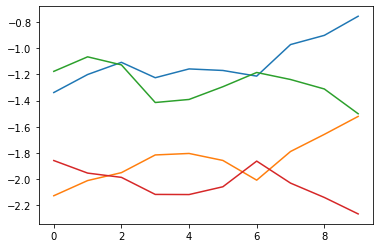

In [ ]:
plt.plot(np.nanmean(df_val[col_config['cols_c'][0]].values, axis=0))
plt.plot(np.nanmean(df_val[col_config['cols_c'][1]].values, axis=0))
plt.plot(np.nanmean(df_val[col_config['cols_c'][2]].values, axis=0))
plt.plot(np.nanmean(df_val[col_config['cols_c'][3]].values, axis=0))
# plt.plot(np.nanmean(df_val.iloc[bet_idxs][col_config['cols_c'][0]].values, axis=0), linestyle='dashed')
# plt.plot(np.nanmean(df_val.iloc[bet_idxs][col_config['cols_c'][1]].values, axis=0), linestyle='dashed')
# plt.plot(np.nanmean(df_val.iloc[bet_idxs][col_config['cols_c'][2]].values, axis=0), linestyle='dotted')
# plt.plot(np.nanmean(df_val.iloc[bet_idxs][col_config['cols_c'][3]].values, axis=0), linestyle='dotted')

In [ ]:
df_val[col_config['cols_c'][0]].values

AttributeError: 'numpy.ndarray' object has no attribute 'nanmean'

In [ ]:
val_preds_fn = df_results.iloc[179]['val_preds']

In [ ]:
val_preds_fn

'val_preds_3194315865378694533.pt'

In [ ]:
# val_preds = torch.load(Path('./experiments/preds/')/val_preds_fn)
val_preds = torch.load(Path('~/google-drive/experiments/preds/').expanduser()/val_preds_fn)

In [ ]:
val_y = ts_experiment.df_base.iloc[160000:185000][['y0', 'y1']].values
val_y = ts_experiment.df_base.iloc[160000:185000]['y1'].values

In [ ]:
for i in np.linspace(0,1,11):
    print(i, unweighted_profit(val_preds, tensor(val_y), i))

0.0 tensor(0.1572)
0.1 tensor(0.1746)
0.2 tensor(0.2227)
0.30000000000000004 tensor(0.2722)
0.4 tensor(0.2407)
0.5 tensor(0.1792)
0.6000000000000001 tensor(0.1551)
0.7000000000000001 tensor(0.1484)
0.8 tensor(0.1175)
0.9 tensor(0.0295)
1.0 tensor(0.)


In [ ]:
np.quantile(val_preds, 0.9)

0.3236408472061175

In [ ]:
(val_preds>0).sum()

tensor(4943)

In [ ]:
val_y

array([[-140.84508 , -107.52688 ],
       [ 100.      ,  100.      ],
       [ -89.28571 ,  -60.97561 ],
       ...,
       [ 100.      ,  100.      ],
       [-123.45679 ,  -91.74312 ],
       [ -23.255814,  100.      ]])

In [ ]:
(val_preds>0).sum(axis=0)

tensor([2999])

In [ ]:
for i in np.linspace(0,0.99,10):
    print(i,unweighted_profit(val_preds, tensor(val_y), i), weighted_profit(val_preds, tensor(val_y), i) )

0.0 tensor(0.1572) tensor(0.1686)
0.11 tensor(0.1586) tensor(0.1651)
0.22 tensor(0.2514) tensor(0.1805)
0.33 tensor(0.2824) tensor(0.1882)
0.44 tensor(0.2237) tensor(0.1662)
0.55 tensor(0.1564) tensor(0.1331)
0.66 tensor(0.1823) tensor(0.1505)
0.77 tensor(0.1268) tensor(0.1095)
0.88 tensor(0.0347) tensor(0.0342)
0.99 tensor(0.0528) tensor(0.0524)


(array([19238.,  1270.,   642.,   501.,   356.,   311.,   307.,   351.,
          477.,  1547.]),
 array([-0.9979087 , -0.7981178 , -0.598327  , -0.3985361 , -0.19874522,
         0.00104564,  0.20083651,  0.40062737,  0.60041827,  0.8002091 ,
         1.        ], dtype=float32),
 <a list of 10 Patch objects>)

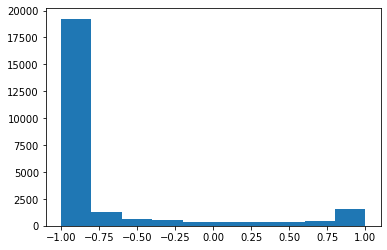

In [ ]:
plt.hist(val_preds.squeeze())

In [ ]:
for i in np.linspace(0,0.99,10):
    print(i, unweighted_profit(val_preds[:,0], tensor(val_y)[:,0], i))

0.0 tensor(0.3076)
0.11 tensor(0.3090)
0.22 tensor(0.3701)
0.33 tensor(0.3159)
0.44 tensor(0.3902)
0.55 tensor(0.2312)
0.66 tensor(0.0569)
0.77 tensor(0.0923)
0.88 tensor(0.0325)
0.99 tensor(0.0040)


In [ ]:
for i in np.linspace(0,0.99,10):
    print(i, unweighted_profit(val_preds[:,1], tensor(val_y)[:,1], i))

0.0 tensor(0.1211)
0.11 tensor(0.2801)
0.22 tensor(0.4071)
0.33 tensor(0.2387)
0.44 tensor(0.1502)
0.55 tensor(0.1520)
0.66 tensor(0.1892)
0.77 tensor(0.0793)
0.88 tensor(0.0773)
0.99 tensor(0.0014)


In [ ]:
df['nf2'].min()

1.05

(array([6944., 5695., 3469., 2256., 1713., 1339., 1129.,  934.,  848.,
         673.]),
 array([-0.99144226, -0.7925983 , -0.5937544 , -0.39491045, -0.19606651,
         0.00277743,  0.20162137,  0.4004653 ,  0.59930927,  0.79815316,
         0.9969971 ], dtype=float32),
 <a list of 10 Patch objects>)

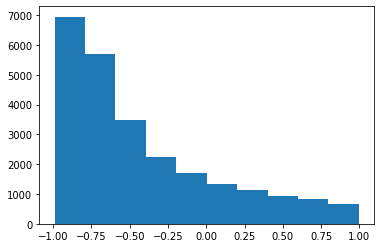

In [ ]:
plt.hist(val_preds.numpy())

In [ ]:
((val_preds[:,0]>0.5)*(val_preds[:,1]>0.5)).sum()

IndexError: index 1 is out of bounds for dimension 1 with size 1

In [ ]:
idxs=((val_preds[:,0]>-2)*(val_preds[:,1]>0.22)*(preds_old[:,0]>0.2))

In [ ]:
idxs=((val_preds[:,0]>-2)*(val_preds[:,0]>0)*(preds_old[:,0]>0.2))
idxs.sum()

tensor(2372)

In [ ]:
np.quantile(val_preds.numpy(), 0.9)

0.3236408472061175

In [ ]:
np.quantile(preds_old.numpy(), 0.9)

0.39351278543472296

In [ ]:
np.quantile(avg_preds_weighted, 0.9)

0.41854079961776797

In [ ]:
idxs= avg_preds_weighted>0.

NameError: name 'avg_preds_weighted' is not defined

In [ ]:
idxs

tensor([[False],
        [False],
        [False],
        ...,
        [False],
        [False],
        [False]])

In [ ]:
np.where(idxs)

(array([    5,     9,    11, ..., 24978, 24986, 24994]),)

In [ ]:
df = ts_experiment.df_base

In [ ]:
df.iloc[160000:185000].iloc[np.where(idxs.squeeze())][['y0', 'y1']].agg(['count', 'mean', 'sum'])

,y0,y1
count,2372.000000,2372.000000
mean,3.819706,2.077369
sum,9060.341817,4927.519705


In [ ]:
unweighted_profit(val_preds[:,1], tensor(val_y)[:,1], 0.22)

tensor(0.4071)

(array([7623., 5453., 3271., 2159., 1619., 1288., 1112., 1002.,  839.,
         634.]),
 array([-0.9917779 , -0.7931333 , -0.59448874, -0.3958442 , -0.19719963,
         0.00144494,  0.2000895 ,  0.39873406,  0.5973786 ,  0.7960232 ,
         0.99466777], dtype=float32),
 <a list of 10 Patch objects>)

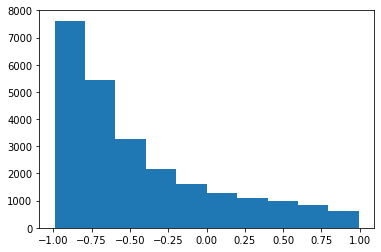

In [ ]:
plt.hist(preds_old.squeeze().numpy())

In [ ]:
avg_preds = torch.stack([preds_old[:,0], val_preds[:,1]], dim=1)

In [ ]:
avg_preds_weighted = 0.5*preds_old[:,0]+0.5*val_preds[:,1]

In [ ]:
avg_preds

tensor([[-0.8471, -0.8901],
        [-0.3006,  0.3380],
        [-0.8300, -0.8416],
        ...,
        [-0.3449, -0.2132],
        [-0.8484, -0.8801],
        [ 0.2257,  0.5204]])

In [ ]:
avg_preds_weighted

tensor([-0.8686,  0.0187, -0.8358,  ..., -0.2790, -0.8642,  0.3731])

In [ ]:
np.quantile(val_preds[:,1].numpy(), 0.9)

0.503340017795563

In [ ]:
avg_preds.shape

torch.Size([25000])

In [ ]:
15/50

0.3

In [ ]:
preds_dir_old = Path('~/coding/python/betting/experiments/dl/nn_exps/preds/val_preds_4816317650882923079.pt').expanduser()

In [ ]:
preds_old = torch.load(preds_dir_old)

In [ ]:
preds_old

tensor([[-0.8471],
        [-0.3006],
        [-0.8300],
        ...,
        [-0.3449],
        [-0.8484],
        [ 0.2257]])

In [ ]:
df = ts_experiment.df_base

In [ ]:
df.iloc[np.where(preds_old.squeeze()>0.39)][['y0', 'y1']].mean()

y0    5.400302
y1    3.016235
dtype: float64

In [ ]:
unweighted_profit_05(preds_old, tensor(df.iloc[160000:185000]['y0'].values), 0.7)

tensor(0.1433)

In [ ]:
val_preds

NameError: name 'val_preds' is not defined

In [ ]:
(preds_old>0).squeeze()

tensor([False, False, False,  ..., False, False,  True])

In [ ]:
df.iloc[160000:185000].iloc[np.where(preds_old.squeeze()>0.4)][['y0', 'y1']].agg(['count', 'mean', 'sum'])

,y0,y1
count,2467.000000,2467.000000
mean,-1.697923,-5.730665
sum,-4188.777054,-14137.551621


In [ ]:
df.iloc[160000:185000].iloc[np.where(preds_old.squeeze()>0.4)]

,nf0,nf1,nf2,nf3,x0_0,x0_1,x0_2,x0_3,x0_4,x0_5,...,x5_2,x5_3,x5_4,x5_5,x5_6,x5_7,x5_8,x5_9,y0,y1
160005,2016-10-15 13:00:00,5.02,24.875622,98.039216,-80.645161,100.000000,-136.986301,100.000000,100.000000,100.000000,...,-1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,-24.875622,-98.039216
160009,2016-10-15 13:30:00,2.52,65.789474,85.470085,-125.000000,-27.397260,100.000000,-59.171598,-68.493151,100.000000,...,-4.0,0.0,2.0,0.0,-1.0,1.0,0.0,1.0,-65.789474,-42.735043
160011,2016-10-15 13:30:00,2.14,87.719298,88.495575,100.000000,100.000000,-73.529412,-78.125000,-61.349693,100.000000,...,0.0,2.0,-1.0,2.0,2.0,0.0,0.0,-2.0,-87.719298,-88.495575
160012,2016-10-15 13:30:00,1.71,140.845070,109.890110,-47.846890,-18.181818,100.000000,-40.650407,100.000000,-14.104372,...,1.0,4.0,2.0,0.0,-2.0,1.0,0.0,-1.0,-140.845070,-109.890110
160023,2016-10-15 14:00:00,4.99,25.062657,111.111111,-15.384615,-8.583691,-19.531250,-44.843049,-12.269939,100.000000,...,4.0,-1.0,0.0,1.0,2.0,2.0,0.0,1.0,-25.062657,-111.111111
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
184938,2017-12-08 18:00:00,2.74,57.471264,101.010101,-33.003300,-26.881720,-51.020408,-51.020408,-23.809524,-12.578616,...,-3.0,-3.0,0.0,1.0,1.0,4.0,0.0,0.0,100.000000,100.000000
184957,2017-12-08 19:30:00,2.60,62.500000,114.942529,-142.857143,100.000000,-144.927536,-34.482759,100.000000,-71.942446,...,3.0,-2.0,2.0,-1.0,-3.0,2.0,-3.0,1.0,-62.500000,-114.942529
184965,2017-12-08 19:45:00,6.08,19.685039,92.592593,100.000000,-98.039216,-31.347962,100.000000,-62.500000,-51.020408,...,1.0,0.0,1.0,2.0,1.0,0.0,4.0,-2.0,100.000000,100.000000
184978,2017-12-08 22:15:00,2.27,78.740157,107.526882,-14.306152,-33.557047,-21.008403,-52.631579,-10.121457,-18.181818,...,0.0,-2.0,0.0,2.0,2.0,1.0,2.0,0.0,100.000000,100.000000


In [ ]:
(preds_old.squeeze()>0).sum()

tensor(4885)

In [ ]:
mask=np.logical_and(val_preds[:,0]>0.5, val_preds[:,1]>0.5).float()

In [ ]:
val_y, mask

(array([[ 100.        ,  100.        ],
        [ -17.21170396, -120.48192771],
        [ 100.        ,  100.        ],
        ...,
        [ 100.        ,  100.        ],
        [-111.11111111, -111.11111111],
        [ 100.        ,  100.        ]]),
 tensor([0., 0., 0.,  ..., 0., 0., 0.]))

In [ ]:
(val_y*mask.numpy()[:, None]).mean(0)

array([0.32399512, 0.21211349])

In [ ]:
val_preds.shape

torch.Size([25000, 2])

In [ ]:
unweighted_profit(val_preds.squeeze(), tensor(val_y)), unweighted_profit(val_preds.squeeze(), tensor(val_y), 0.5) 

(tensor(0.2459), tensor(0.1889))

In [ ]:
(val_preds>0.4).sum()

tensor(3467)

In [ ]:
unweighted_profit

<function torchtools.core.unweighted_profit(preds, y_true, threshold=0)>

(array([7604., 4376., 2793., 2132., 1756., 1472., 1400., 1222., 1232.,
        1013.]),
 array([-9.9853188e-01, -7.9881412e-01, -5.9909636e-01, -3.9937857e-01,
        -1.9966081e-01,  5.6952238e-05,  1.9977471e-01,  3.9949247e-01,
         5.9921026e-01,  7.9892802e-01,  9.9864578e-01], dtype=float32),
 <a list of 10 Patch objects>)

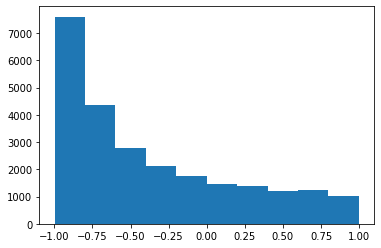

In [ ]:
plt.hist(val_preds.cpu().squeeze().numpy())

In [ ]:
df_fn_test = 'results4.csv'

In [ ]:
ts_experiment.run_grid_search(hypers, df_fn_test)

{'arch': <class 'torchtools.models.InceptionTimeD'>, 'n_epochs': 1, 'max_lr': 1e-05, 'wd': 0.03, 'loss_fn_name': 'leaky_loss', 'alpha': 0.5, 'metrics': [<function unweighted_profit at 0x7ffb4cd88d40>], 'N': 3, 'magnitude': 0.4, 'seed': 1234, 'pct_start': 0.3, 'div_factor': 25.0, 'aug': 'augmix', 'bs': 64, 'ds_id': 'bi_sample_anon_anon10hc_4c_2d_y_y0_7_9'}
pct_start: 0.3 div_factor: 25.0
[TSStandardize: (TSTensor,object) -> encodes
(NumpyTensor,object) -> encodes ]
Pipeline: TSStandardize Pipeline: TSStandardize
augmix
tfms None
False
functools.partial(<function leaky_loss at 0x7ffb4cd88830>, alpha=0.5)
Pipeline: TSStandardize -> Augmix


epoch,train_loss,valid_loss,unweighted_profit,time
0,-0.115491,0.080019,0.913272,00:05


In [ ]:
from types import 

In [ ]:
#export
def _get_arch(arch:str, with_discrete=False):
    if arch.lower()=='inception': return InceptionTimeSgm if not with_discrete else InceptionTimeD
    elif arch.lower()=='resnet': return 'ResNet not implemented'
    else: return None

In [ ]:
#export
from fastscript import *
@call_parse
def main(n_epochs:Param(help="n_epochs list", nargs='+', type=int)=[10],
         max_lr:Param(help="max_lr list", nargs='+', type=float)=[1e-5],
         wd:Param(help="wd (weight decay) hpyerparameter list", nargs='+', type=float)=[0.03],
         div_factor:Param(help="div_factor hpyerparameter list", nargs='+', type=float)=[25.0],
         seed:Param(help="seed hpyerparameter list", nargs='+', type=int)=[1234],
         N:Param(help="N hpyerparameter list", nargs='+', type=int)=[3],
         magnitude:Param(help="magnitude hpyerparameter list", nargs='+', type=float)=[0.3],
         alpha:Param(help="alpha hpyerparameter list", nargs='+', type=float)=[0.5],
         aug:Param(help="augmentation policy", choices=[None, 'randaugment', 'augmix'], type=str)=None,
         nrows:Param(help="n_epochs list", type=int)=None,
         bs:Param(help="batch size", type=int)=128,
         trn_end:Param(help="n_epochs list", type=int)=None,
         val_end:Param(help="n_epochs list", type=int)=None,
         test_end:Param(help="n_epochs list", type=int)=None,
         df_fn:Param(help="dataframe filename", type=str)='bi_sample_anon.csv',         
         df_dir:Param(help="dataframe dir", type=str)='./data/custom',
         df_results:Param(help="results dataframe filename", type=str)='results_script.csv',
         config_fn:Param(help="json column configuration filename", type=str)='config2.json',    
         config_id:Param(help="column configuration id", type=str)='anon2hc_4c_2d_y',
         arch:Param(help="model architecture", choices=['inception', 'resnet'], type=str)='inception',
         upper:Param("Convert to uppercase?", bool_arg)=False):
#     print(msg.upper() if upper else msg)
    
   
    
    train_params['aug']=aug
    
    df_path=Path(df_dir)/df_fn
    print(df_path)
    
    col_config=read_config(config_id, config_fn)
    data_params = build_data_params(df_path, col_config=col_config, nrows=nrows, trn_end=trn_end, val_end=val_end,
                                   test_end=test_end, bs=bs)
#     print(data_params)

    train_params['metrics']=[unweighted_profit, unweighted_profit_05]
    train_params['arch']=_get_arch(arch, col_config['cols_d'] is not None)
    ts_experiment = TSExperiments()
    ts_experiment.setup_data(data_params)
    ts_experiment.setup_training(train_params)
                                 
    hypers = {'n_epochs': n_epochs, 'max_lr':max_lr, 'wd':wd, 'seed': seed, 'div_factor':div_factor,
             'N':N, 'magnitude':magnitude}
    print(hypers)
    
    ts_experiment.run_grid_search(hypers, df_results)

In [ ]:
!python -m torchtools.experiments_2 --n_epochs 20 --trn_end 16000 --val_end 18500 --test_end 21000 --aug 'augmix' --bs 256 --max_lr 1e-5 --magnitude 0.4 --config_id 'anon10hc_6c_y' --arch 'inception' --df_result='results10.csv' --magnitude 0.5 --wd 0.01 0.1

data/custom/bi_sample_anon.csv
{'anon2hc_4c_2d_y': {'cols_c': [['x0_0', 'x0_1', 'x0_2', 'x0_3', 'x0_4', 'x0_5', 'x0_6', 'x0_7', 'x0_8', 'x0_9'], ['x1_0', 'x1_1', 'x1_2', 'x1_3', 'x1_4', 'x1_5', 'x1_6', 'x1_7', 'x1_8', 'x1_9'], ['x3_0', 'x3_1', 'x3_2', 'x3_3', 'x3_4', 'x3_5', 'x3_6', 'x3_7', 'x3_8', 'x3_9'], ['x4_0', 'x4_1', 'x4_2', 'x4_3', 'x4_4', 'x4_5', 'x4_6', 'x4_7', 'x4_8', 'x4_9']], 'cols_d': [['x2_0', 'x2_1', 'x2_2', 'x2_3', 'x2_4', 'x2_5', 'x2_6', 'x2_7', 'x2_8', 'x2_9'], ['x5_0', 'x5_1', 'x5_2', 'x5_3', 'x5_4', 'x5_5', 'x5_6', 'x5_7', 'x5_8', 'x5_9']], 'cols_y': 'y0', 'id': 'anon2hc_4c_2d_y'}, 'anonMODhc_4c_2d_y': {'cols_c': [['x0_0', 'x0_1', 'x0_2', 'x0_3', 'x0_4', 'x0_5', 'x0_6', 'x0_7', 'x0_8', 'x0_9'], ['x1_0', 'x1_1', 'x1_2', 'x1_3', 'x1_4', 'x1_5', 'x1_6', 'x1_7', 'x1_8', 'x1_9'], ['x3_0', 'x3_1', 'x3_2', 'x3_3', 'x3_4', 'x3_5', 'x3_6', 'x3_7', 'x3_8', 'x3_9'], ['x4_0', 'x4_1', 'x4_2', 'x4_3', 'x4_4', 'x4_5', 'x4_6', 'x4_7', 'x4_8', 'x4_9']], 'cols_d': [['x2_0', 'x2_1', 

In [ ]:
build_data_params??

In [ ]:
col_config

'6chan_anon_discrete'

In [ ]:
col_config['cols_d']

TypeError: string indices must be integers

In [ ]:
ts_experiment.run_experiment(df_fn_test)

pct_start: 0.3 div_factor: 25.0
[TSStandardize: (TSTensor,object) -> encodes
(NumpyTensor,object) -> encodes ]
Pipeline: TSStandardize Pipeline: TSStandardize
augmix
tfms None
False
functools.partial(<function leaky_loss at 0x7ffb4cd88830>, alpha=0.5)
Pipeline: TSStandardize -> Augmix


epoch,train_loss,valid_loss,unweighted_profit,time
0,-0.115491,0.080023,0.913272,00:05


not new


In [ ]:
ts_experiment.run_training()

AssertionError: must pass loss_fn_name, and n_epochs

In [ ]:
df_results=pd.read_csv(Path('./experiments/results')/df_fn_test)

In [ ]:
pd.options.display.max_columns = 99
df_results

,arch,n_epochs,max_lr,wd,loss_fn_name,alpha,metric_0,N,magnitude,seed,pct_start,div_factor,aug,bs,ds_id,trn_loss,val_loss,trn_loss_min,val_loss_min,unweighted_profit_0_value,unweighted_profit_0_max,Timestamp,val_preds
0,InceptionTimeD,1,0.00001,0.03,leaky_loss,0.5,unweighted_profit,3,0.4,1234,0.3,25.0,augmix,64,bi_sample_anon_anon10hc_4c_2d_y_y0_7_9,-0.115491,0.080019,-0.115491,0.080019,0.913272,0.913272,2020-05-27 15:14:56.653489,val_preds_9053062032374795896.pt


In [ ]:
xc, xd, y = ts_experiment.learn.dls[1].one_batch()

In [ ]:
xc.shape

torch.Size([256, 4, 10])

In [ ]:
# data_params['splits'] =  L(L(range(8000)), L(range(8000,9000)))

In [ ]:
train_params['aug']='randaugment'
train_params['verbose']=True

In [ ]:
get

In [ ]:
ts_experiments = TSExperiments(train_params)

In [ ]:
train_params

{'arch': torchtools.models.InceptionTimeD,
 'n_epochs': 5,
 'max_lr': 1e-05,
 'wd': 0.03,
 'loss_fn_name': 'leaky_loss',
 'alpha': 0.5,
 'metrics': [<function torchtools.core.unweighted_profit(preds, y_true, threshold=0)>],
 'N': 3,
 'magnitude': 0.4,
 'bs': 256,
 'seed': 1234,
 'ds_name': 'bi_sample_anon_6chan_anon_discrete_y0_120_160_200',
 'pct_start': 0.3,
 'div_factor': 25.0,
 'aug': 'randaugment',
 'verbose': True}

In [ ]:
ts_experiments.setup_data(df_main, data_params)

(218000, 4, 10) (218000, 2, 10)
<class 'torchtools.experiments.TSDatasets3'>
3
torch.Size([120000, 4, 10]) torch.Size([120000]) torch.Size([120000, 2, 10])
torch.Size([40000, 4, 10]) torch.Size([40000]) torch.Size([40000, 2, 10])
torch.Size([40000, 4, 10]) torch.Size([40000]) torch.Size([40000, 2, 10])


In [ ]:
ts_experiments.bs

256

In [ ]:
train_params.keys()

dict_keys(['arch', 'n_epochs', 'max_lr', 'wd', 'loss_fn_name', 'alpha', 'metrics', 'N', 'magnitude', 'bs', 'seed', 'ds_name', 'pct_start', 'div_factor', 'aug', 'verbose'])

In [ ]:
hypers = {'n_epochs': [1], 'max_lr':[1e-5]}

df_fn_test = 'results3.csv'

In [ ]:
TSStandardize??

In [ ]:
ts_experiments.run_grid_search(hypers, df_results_fn=df_fn_test)

{'arch': <class 'torchtools.models.InceptionTimeD'>, 'n_epochs': 1, 'max_lr': 1e-05, 'wd': 0.03, 'loss_fn_name': 'leaky_loss', 'alpha': 0.5, 'metrics': [<function unweighted_profit at 0x7efc20b5dd40>], 'N': 3, 'magnitude': 0.4, 'bs': 256, 'seed': 1234, 'ds_name': 'bi_sample_anon_6chan_anon_discrete_y0_120_160_200', 'pct_start': 0.3, 'div_factor': 25.0, 'aug': 'randaugment', 'verbose': True}
pct_start: 0.3 div_factor: 25.0
[TSStandardize: (TSTensor,object) -> encodes
(NumpyTensor,object) -> encodes ]
Pipeline: TSStandardize Pipeline: TSStandardize
randaugment
tfms None
False
functools.partial(<function leaky_loss at 0x7efc20b5d830>, alpha=0.5)
Pipeline: TSStandardize -> RandAugment


epoch,train_loss,valid_loss,unweighted_profit,time
0,-0.151885,-0.190378,-0.007342,01:12


randzoom
zoomin
ywarp
timewarp
dimout
ynormal
zoomout
ywarp
randzoom
dimout
yscale
cutout
randomcrop
yscale
ywarp
zoomout
timenormal torch.Size([128, 4, 10])
timewarp
crop
yscale
ywarp
crop
zoomout
cutout
timestepzero
zoomout
randomcrop
randomcrop
maskout
timenormal torch.Size([128, 4, 10])
cutout
timenormal torch.Size([128, 4, 10])
timestepzero
timestepzero
yscale
zoomout
ywarp
timestepzero
timewarp
maskout
randtimestep
timewarp
ywarp
zoomout
randtimestep
cutout
randtimestep
timestepzero
yscale
randomcrop
zoomout
dimout
ynormal
ywarp
randzoom
dimout
randomcrop
timestepzero
zoomout
randomcrop
randtimestep
timewarp
ywarp
cutout
randzoom
timestepzero
ynormal
randomcrop
timestepzero
timestepzero
crop
ywarp
ynormal
zoomin
crop
ynormal
dimout
randzoom
cutout
ynormal
zoomout
timestepzero
dimout
timewarp
randtimestep
zoomin
randzoom
yscale
randomcrop
maskout
crop
randomcrop
ywarp
ywarp
yscale
zoomin
dimout
randomcrop
zoomin
cutout
randomcrop
zoomout
zoomin
ywarp
timewarp
timenormal torch.Size

cutout
yscale
cutout
dimout
dimout
crop
maskout
ywarp
timestepzero
randtimestep
zoomin
randzoom
crop
zoomin
timestepzero
randzoom
ynormal
zoomin
zoomout
timewarp
randtimestep
cutout
randtimestep
crop
yscale
randtimestep
ynormal
yscale
randtimestep
cutout
zoomin
ynormal
cutout
randzoom
timewarp
maskout
randomcrop
randzoom
zoomin
zoomout
crop
randzoom
yscale
randzoom
timestepzero
timenormal torch.Size([128, 4, 10])
ynormal
timestepzero
yscale
timewarp
timenormal torch.Size([128, 4, 10])
randomcrop
ywarp
randtimestep
zoomout
dimout
timewarp
crop
zoomin
yscale
randtimestep
crop
zoomout
cutout
timewarp
cutout
timenormal torch.Size([128, 4, 10])
timestepzero
randtimestep
randzoom
zoomin
timenormal torch.Size([128, 4, 10])
randtimestep
crop
randzoom
ynormal
randzoom
yscale
randtimestep
yscale
zoomin
randzoom
yscale
timewarp
dimout
randomcrop
timestepzero
timewarp
timenormal torch.Size([128, 4, 10])
cutout
ywarp
maskout
zoomout
timenormal torch.Size([128, 4, 10])
yscale
randomcrop
zoomout
mask

randomcrop
randzoom
dimout
randtimestep
randomcrop
ywarp
randtimestep
zoomin
cutout
yscale
zoomout
randtimestep
ywarp
zoomout
crop
timestepzero
ywarp
randtimestep
randtimestep
timewarp
timestepzero
dimout
zoomin
timenormal torch.Size([128, 4, 10])
timewarp
cutout
timestepzero
timewarp
dimout
zoomin
timestepzero
ywarp
zoomout
randtimestep
randomcrop
timewarp
timewarp
cutout
randzoom
randzoom
timestepzero
zoomin
timenormal torch.Size([128, 4, 10])
randzoom
maskout
zoomout
timewarp
randomcrop
cutout
dimout
randzoom
randtimestep
crop
randzoom
timestepzero
crop
cutout
ywarp
ynormal
dimout
zoomin
ynormal
randzoom
crop
maskout
randomcrop
crop
timestepzero
randzoom
timewarp
dimout
ywarp
randomcrop
zoomin
dimout
cutout
ynormal
zoomout
yscale
ynormal
timewarp
randtimestep
randomcrop
timewarp
ynormal
cutout
maskout
zoomin
timenormal torch.Size([128, 4, 10])
zoomout
zoomout
timenormal torch.Size([128, 4, 10])
cutout
ynormal
zoomin
ywarp
timenormal torch.Size([128, 4, 10])
randomcrop
ywarp
dimout
m

ynormal
randzoom
yscale
dimout
timestepzero
randtimestep
dimout
crop
randomcrop
dimout
maskout
timenormal torch.Size([128, 4, 10])
maskout
yscale
timewarp
ynormal
randomcrop
randzoom
crop
yscale
timewarp
randzoom
dimout
zoomout
timenormal torch.Size([128, 4, 10])
maskout
timestepzero
ywarp
randomcrop
maskout
zoomin
timestepzero
dimout
randomcrop
zoomin
maskout
randtimestep
ywarp
maskout
yscale
dimout
timewarp
maskout
zoomout
timewarp
maskout
timestepzero
randtimestep
ywarp
randomcrop
timestepzero
randomcrop
ynormal
timestepzero
zoomin
ywarp
maskout
zoomout
zoomin
randtimestep
ywarp
ynormal
timestepzero
cutout
maskout
timenormal torch.Size([128, 4, 10])
yscale
zoomin
timestepzero
cutout
maskout
ynormal
timenormal torch.Size([128, 4, 10])
dimout
zoomin
randomcrop
crop
timestepzero
timenormal torch.Size([128, 4, 10])
maskout
yscale
timewarp
crop
randtimestep
timenormal torch.Size([128, 4, 10])
ywarp
zoomout
dimout
ywarp
ynormal
ynormal
crop
randomcrop
yscale
ynormal
dimout
cutout
maskout


In [ ]:
ts_experiments.learn.dls.after_batch.tfms

[YWarp: (TSIntTensor,object) -> encodes
 (TSTensor,object) -> encodes , YNormal: (TSIntTensor,object) -> encodes
 (TSTensor,object) -> encodes , YScale: (TSIntTensor,object) -> encodes
 (TSTensor,object) -> encodes , TimeWarp: (TSIntTensor,object) -> encodes
 (TSTensor,object) -> encodes , TimeNormal: (TSTensor,object) -> encodes , Dimout: (TSIntTensor,object) -> encodes
 (TSTensor,object) -> encodes , Cutout: (TSIntTensor,object) -> encodes
 (TSTensor,object) -> encodes , TimestepZero: (TSIntTensor,object) -> encodes
 (TSTensor,object) -> encodes , Crop: (TSIntTensor,object) -> encodes
 (TSTensor,object) -> encodes , RandomCrop: (TSIntTensor,object) -> encodes
 (TSTensor,object) -> encodes , Maskout: (TSIntTensor,object) -> encodes
 (TSTensor,object) -> encodes , Zoomin: (TSIntTensor,object) -> encodes
 (TSTensor,object) -> encodes , Zoomout: (TSIntTensor,object) -> encodes
 (TSTensor,object) -> encodes , RandZoom: (TSIntTensor,object) -> encodes
 (TSTensor,object) -> encodes , RandTi

In [ ]:
xc,xd,yb = ts_experiments.learn.dls.one_batch()

weights [0.19249035 0.22298341 0.58452624], m 0.23224278480041766
ops in step 0 [RandTimesteps: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes
 YScale: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes
 Crop: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes ]
randtimestep
yscale
crop
ops in step 1 [YNormal: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes ]
ynormal
ops in step 2 [Zoomin: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes
 TimestepZero: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes ]
zoomin
timestepzero
weights [0.1724217  0.20476278 0.62281552], m 0.9112778892979606
ops in step 0 [YScale: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes
 Cutout: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes ]
yscale
cutout
ops in step 1 [TimeWarp: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes
 TimestepZero: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes
 YSc

In [ ]:
ts_experiments.run_grid_search(hypers, df_results_fn=df_fn_test)

{'arch': <class 'torchtools.models.InceptionTimeD'>, 'n_epochs': 2, 'max_lr': 1e-05, 'wd': 0.03, 'loss_fn_name': 'leaky_loss', 'alpha': 0.5, 'metrics': [<function unweighted_profit at 0x7fe0f95badd0>], 'N': 3, 'magnitude': 0.4, 'bs': 128, 'seed': 1234, 'ds_name': 'bi_sample_anon_6chan_anon_discrete_y0_120_160_200', 'pct_start': 0.3, 'div_factor': 25.0, 'aug': 'augmix', 'verbose': True}
pct_start: 0.3 div_factor: 25.0
[TSStandardize: (TSTensor,object) -> encodes
(NumpyTensor,object) -> encodes ]
Pipeline: TSStandardize Pipeline: TSStandardize
augmix
tfms None
False
functools.partial(<function leaky_loss at 0x7fe0f95ba8c0>, alpha=0.5)
Pipeline: TSStandardize -> Augmix


epoch,train_loss,valid_loss,unweighted_profit,time
0,-0.095084,-0.000864,1.353308,00:06
1,-0.169261,0.016647,1.220281,00:06


weights [0.12069069 0.55244944 0.32685987], m 0.4964742723937071
ops in step 0 [TimestepZero: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes
 RandTimesteps: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes
 YScale: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes ]
timestepzero
randtimestep
yscale
ops in step 1 [RandomCrop: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes
 YScale: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes ]
randomcrop
yscale
ops in step 2 [TimeNormal: (TSTensor,object) -> encodes ]
timenormal torch.Size([128, 4, 10])
weights [0.09596037 0.3006876  0.60335203], m 0.9468840301872898
ops in step 0 [Zoomin: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes ]
zoomin
ops in step 1 [TimeNormal: (TSTensor,object) -> encodes
 Dimout: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes ]
timenormal torch.Size([128, 2, 10])
dimout
ops in step 2 [Maskout: (TSIntTensor,object) -> encodes
(TSTen

ops in step 2 [RandTimesteps: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes ]
randtimestep
weights [0.36183297 0.11189329 0.52627374], m 0.28000372091087505
ops in step 0 [YScale: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes
 Maskout: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes ]
yscale
maskout
ops in step 1 [Crop: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes ]
crop
ops in step 2 [Crop: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes
 Zoomin: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes ]
crop
zoomin
weights [0.54311766 0.19290497 0.26397737], m 0.19061532457255295
ops in step 0 [Crop: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes
 Zoomin: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes ]
crop
zoomin
ops in step 1 [YScale: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes
 RandZoom: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes ]
yscale
rand

weights [0.14219935 0.28489953 0.57290113], m 0.44482877974484847
ops in step 0 [Zoomin: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes
 YWarp: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes
 TimeWarp: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes ]
zoomin
ywarp
timewarp
ops in step 1 [RandomCrop: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes ]
randomcrop
ops in step 2 [RandTimesteps: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes ]
randtimestep
weights [0.05411261 0.39699056 0.54889683], m 0.5970595951460437
ops in step 0 [YNormal: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes ]
ynormal
ops in step 1 [Zoomin: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes
 Cutout: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes ]
zoomin
cutout
ops in step 2 [Maskout: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes ]
maskout
weights [0.7222203  0.25429657 0.02348313], m 0.13117

weights [0.53856419 0.42008207 0.04135373], m 0.8837306366479485
ops in step 0 [Zoomin: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes
 TimeWarp: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes ]
zoomin
timewarp
ops in step 1 [RandTimesteps: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes
 Crop: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes ]
randtimestep
crop
ops in step 2 [RandZoom: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes ]
randzoom
weights [0.292744   0.68414425 0.02311175], m 0.6111799990106732
ops in step 0 [TimeWarp: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes ]
timewarp
ops in step 1 [YNormal: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes ]
ynormal
ops in step 2 [YScale: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes
 YNormal: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes ]
yscale
ynormal
weights [0.13615377 0.73312451 0.13072172], m 0.60697716

weights [0.05498763 0.8929844  0.05202797], m 0.2892986887372791
ops in step 0 [YNormal: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes
 Dimout: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes
 Zoomout: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes ]
ynormal
dimout
zoomout
ops in step 1 [Zoomout: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes ]
zoomout
ops in step 2 [TimestepZero: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes ]
timestepzero
weights [0.43481255 0.42064778 0.14453967], m 0.8399734481702399
ops in step 0 [RandTimesteps: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes ]
randtimestep
ops in step 1 [YScale: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes ]
yscale
ops in step 2 [RandTimesteps: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes ]
randtimestep
weights [0.4023701  0.22462517 0.37300474], m 0.18097081861684775
ops in step 0 [TimeWarp: (TSIntTensor,object) ->

ops in step 1 [Maskout: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes ]
maskout
ops in step 2 [YScale: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes
 Dimout: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes
 TimeWarp: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes ]
yscale
dimout
timewarp
weights [0.33288446 0.57351073 0.0936048 ], m 0.37166436931122276
ops in step 0 [Maskout: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes
 RandTimesteps: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes
 TimeNormal: (TSTensor,object) -> encodes ]
maskout
randtimestep
timenormal torch.Size([128, 2, 10])
ops in step 1 [RandTimesteps: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes ]
randtimestep
ops in step 2 [RandTimesteps: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes
 Dimout: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes ]
randtimestep
dimout
weights [0.0808892  0.10670357 0.812

weights [0.833598   0.14441798 0.02198402], m 0.10949426690480167
ops in step 0 [YNormal: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes ]
ynormal
ops in step 1 [Crop: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes
 YNormal: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes ]
crop
ynormal
ops in step 2 [Zoomin: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes
 YWarp: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes ]
zoomin
ywarp
weights [0.48463814 0.39655137 0.11881049], m 0.8745266593524675
ops in step 0 [TimeNormal: (TSTensor,object) -> encodes ]
timenormal torch.Size([128, 2, 10])
ops in step 1 [Maskout: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes ]
maskout
ops in step 2 [Crop: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes ]
crop
weights [0.21650948 0.01783831 0.76565221], m 0.07393646282460048
ops in step 0 [Crop: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes
 YNormal: (T

ops in step 2 [YWarp: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes ]
ywarp
weights [0.03875483 0.07180667 0.8894385 ], m 0.4585558247122264
ops in step 0 [TimeNormal: (TSTensor,object) -> encodes
 YScale: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes ]
timenormal torch.Size([128, 4, 10])
yscale
ops in step 1 [YNormal: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes
 Cutout: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes ]
ynormal
cutout
ops in step 2 [RandomCrop: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes ]
randomcrop
weights [0.16147287 0.43529661 0.40323052], m 0.5392888955040529
ops in step 0 [Zoomin: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes
 TimestepZero: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes ]
zoomin
timestepzero
ops in step 1 [TimeWarp: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes
 YWarp: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encode

weights [0.38782915 0.44196385 0.170207  ], m 0.5703429898578228
ops in step 0 [RandomCrop: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes ]
randomcrop
ops in step 1 [Maskout: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes
 TimeWarp: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes
 RandomCrop: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes ]
maskout
timewarp
randomcrop
ops in step 2 [YScale: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes
 TimestepZero: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes
 Zoomout: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes ]
yscale
timestepzero
zoomout
weights [0.28156206 0.37918538 0.33925256], m 0.7847754588949705
ops in step 0 [TimestepZero: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes
 YScale: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes ]
timestepzero
yscale
ops in step 1 [YWarp: (TSIntTensor,object) -> encodes
(TSTensor,o

weights [0.52376694 0.14937016 0.3268629 ], m 0.22960201364383345
ops in step 0 [YNormal: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes
 RandZoom: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes ]
ynormal
randzoom
ops in step 1 [TimeWarp: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes ]
timewarp
ops in step 2 [YWarp: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes
 RandomCrop: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes ]
ywarp
randomcrop
weights [0.25353343 0.56229304 0.18417353], m 0.2509990363227259
ops in step 0 [YWarp: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes ]
ywarp
ops in step 1 [Crop: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes ]
crop
ops in step 2 [YNormal: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes
 Zoomout: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes
 TimestepZero: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes ]
ynorma

weights [0.42106119 0.17272874 0.40621007], m 0.14583353106407512
ops in step 0 [Zoomin: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes
 YNormal: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes ]
zoomin
ynormal
ops in step 1 [TimeNormal: (TSTensor,object) -> encodes ]
timenormal torch.Size([128, 4, 10])
ops in step 2 [TimeWarp: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes
 RandTimesteps: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes ]
timewarp
randtimestep
weights [0.40483518 0.05063975 0.54452507], m 0.7852789135836744
ops in step 0 [RandomCrop: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes ]
randomcrop
ops in step 1 [TimeNormal: (TSTensor,object) -> encodes ]
timenormal torch.Size([128, 2, 10])
ops in step 2 [Dimout: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes
 TimestepZero: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes
 YWarp: (TSIntTensor,object) -> encodes
(TSTensor,object) -> 

weights [0.23454392 0.18503727 0.58041881], m 0.12864340838580923
ops in step 0 [RandomCrop: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes ]
randomcrop
ops in step 1 [Zoomin: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes
 RandZoom: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes
 YNormal: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes ]
zoomin
randzoom
ynormal
ops in step 2 [RandomCrop: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes
 RandZoom: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes ]
randomcrop
randzoom
weights [0.38221736 0.34027273 0.27750991], m 0.4144329713997862
ops in step 0 [Maskout: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes ]
maskout
ops in step 1 [RandomCrop: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes
 Cutout: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes ]
randomcrop
cutout
ops in step 2 [Maskout: (TSIntTensor,object) -> encodes
(TST

weights [0.10444148 0.75591782 0.1396407 ], m 0.46649219915624374
ops in step 0 [Zoomin: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes
 Maskout: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes
 Zoomout: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes ]
zoomin
maskout
zoomout
ops in step 1 [TimeNormal: (TSTensor,object) -> encodes
 RandZoom: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes ]
timenormal torch.Size([128, 4, 10])
randzoom
ops in step 2 [YWarp: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes
 Dimout: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes
 RandomCrop: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes ]
ywarp
dimout
randomcrop
weights [0.62949586 0.3075981  0.06290604], m 0.7793084502910711
ops in step 0 [TimeNormal: (TSTensor,object) -> encodes
 Dimout: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes ]
timenormal torch.Size([128, 2, 10])
dimout
ops in step 1 [Zoom

weights [0.04171741 0.05979662 0.89848597], m 0.8774144633533665
ops in step 0 [Maskout: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes ]
maskout
ops in step 1 [Zoomout: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes ]
zoomout
ops in step 2 [Maskout: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes
 YNormal: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes
 YWarp: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes ]
maskout
ynormal
ywarp
weights [0.0266405  0.17664651 0.79671299], m 0.43368474018891734
ops in step 0 [Zoomin: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes
 Crop: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes ]
zoomin
crop
ops in step 1 [TimeWarp: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes
 RandTimesteps: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes ]
timewarp
randtimestep
ops in step 2 [YWarp: (TSIntTensor,object) -> encodes
(TSTensor,object) -> en

weights [0.88726721 0.09142985 0.02130294], m 0.7628493978982696
ops in step 0 [Cutout: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes
 YWarp: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes
 RandomCrop: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes ]
cutout
ywarp
randomcrop
ops in step 1 [TimestepZero: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes ]
timestepzero
ops in step 2 [Maskout: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes ]
maskout
weights [0.23764613 0.4627811  0.29957277], m 0.371381675907249
ops in step 0 [Zoomout: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes
 TimeNormal: (TSTensor,object) -> encodes ]
zoomout
timenormal torch.Size([128, 2, 10])
ops in step 1 [Cutout: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes ]
cutout
ops in step 2 [Zoomin: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes ]
zoomin
weights [0.35124496 0.46140027 0.18735476], m 0.47359177902

weights [0.40860271 0.23747431 0.35392297], m 0.2220175497976628
ops in step 0 [RandZoom: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes ]
randzoom
ops in step 1 [TimeWarp: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes
 TimeNormal: (TSTensor,object) -> encodes
 Zoomin: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes ]
timewarp
timenormal torch.Size([128, 4, 10])
zoomin
ops in step 2 [TimestepZero: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes
 Dimout: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes
 RandTimesteps: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes ]
timestepzero
dimout
randtimestep
weights [0.33150604 0.44081341 0.22768055], m 0.3558506231773939
ops in step 0 [YWarp: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes ]
ywarp
ops in step 1 [TimeWarp: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes
 YNormal: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes ]

weights [0.16784114 0.40118121 0.43097765], m 0.10441148757315581
ops in step 0 [TimestepZero: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes
 Crop: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes
 YNormal: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes ]
timestepzero
crop
ynormal
ops in step 1 [YWarp: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes
 Crop: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes ]
ywarp
crop
ops in step 2 [YWarp: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes
 Crop: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes ]
ywarp
crop
weights [0.0715563  0.27648085 0.65196285], m 0.6285719200594324
ops in step 0 [Cutout: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes ]
cutout
ops in step 1 [Zoomin: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes
 TimeNormal: (TSTensor,object) -> encodes
 Crop: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encod

not new


In [ ]:
xbs = ts_experiments.dls.after_batch[0](xb)

In [ ]:
p = ts_experiments.dls.after_batch

In [ ]:
Pipeline??

In [ ]:
compose_tfms(xb, p, split_idx=0)

weights [0.07832728 0.57126234 0.35041038], m 0.03859473643731344
ops in step 0 [YScale: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes
 TimeWarp: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes
 TimeNormal: (TSTensor,object) -> encodes ]
yscale
timewarp
timenormal torch.Size([128, 4, 10])
ops in step 1 [YNormal: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes ]
ynormal
ops in step 2 [TimeNormal: (TSTensor,object) -> encodes ]
timenormal torch.Size([128, 4, 10])


TSTensor([[[-0.0072,  0.0366,  0.0059,  ...,  0.0804,  0.0284,  0.0023],
         [-0.0338,  0.1043,  0.1340,  ...,  0.0086,  0.0221,  0.0226],
         [ 0.0247,  0.0898,  0.0891,  ...,  0.0290, -0.0932,  0.0233],
         [ 0.0205, -0.0366,  0.0350,  ...,  0.0738,  0.0173,  0.0175]],

        [[ 0.0050,  0.0460,  0.0304,  ...,  0.0684,  0.0551, -0.0158],
         [-0.0257,  0.1073,  0.1560,  ...,  0.0086,  0.0218,  0.0224],
         [ 0.0484,  0.1165,  0.0962,  ...,  0.0359, -0.0837,  0.0050],
         [ 0.0579, -0.0103,  0.0170,  ...,  0.0744,  0.0170,  0.0173]],

        [[ 0.0029,  0.0246,  0.0254,  ...,  0.0557,  0.0748,  0.0023],
         [-0.0077,  0.1022,  0.1411,  ..., -0.0052,  0.0234,  0.0226],
         [ 0.0484,  0.1154,  0.1139,  ...,  0.0199, -0.0690,  0.0233],
         [ 0.0579, -0.0148,  0.0457,  ...,  0.0749,  0.0172,  0.0175]],

        ...,

        [[-0.0008,  0.0458,  0.0304,  ...,  0.0684,  0.0551, -0.0158],
         [-0.0451,  0.1077,  0.1559,  ...,  0.0086,  0.

In [ ]:
ts_experiments.dls.after_batch[1](xbs)

weights [0.32536308 0.04528067 0.62935625], m 0.5590176479614829
ops in step 0 [YNormal: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes
 TimeNormal: (TSTensor,object) -> encodes ]
ynormal
timenormal torch.Size([128, 4, 10])
ops in step 1 [YNormal: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes
 YScale: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes ]
ynormal
yscale
ops in step 2 [TimeNormal: (TSTensor,object) -> encodes
 YScale: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes
 YNormal: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes ]
timenormal torch.Size([128, 4, 10])
yscale
ynormal


TSTensor([[[-0.0437, -0.0329,  0.0056,  ...,  0.0345,  0.0015,  0.0726],
         [ 0.0055,  0.0702, -0.0085,  ...,  0.0191, -0.0207, -0.0069],
         [ 0.0177,  0.0196,  0.0302,  ...,  0.0214, -0.0053, -0.0070],
         [ 0.0546, -0.0541,  0.0097,  ...,  0.0021,  0.0398, -0.0182]],

        [[-0.0312, -0.0214,  0.0278,  ...,  0.0242,  0.0282,  0.0540],
         [ 0.0137,  0.0724,  0.0101,  ...,  0.0189, -0.0209, -0.0070],
         [ 0.0420,  0.0469,  0.0389,  ...,  0.0283,  0.0042, -0.0257],
         [ 0.0928, -0.0290, -0.0166,  ...,  0.0062,  0.0389, -0.0184]],

        [[-0.0334, -0.0415,  0.0272,  ...,  0.0120,  0.0455,  0.0726],
         [ 0.0322,  0.0701,  0.0017,  ...,  0.0039, -0.0204, -0.0069],
         [ 0.0420,  0.0459,  0.0560,  ...,  0.0169,  0.0185, -0.0070],
         [ 0.0928, -0.0324,  0.0209,  ...,  0.0074,  0.0388, -0.0182]],

        ...,

        [[-0.0371, -0.0214,  0.0279,  ...,  0.0242,  0.0282,  0.0540],
         [-0.0061,  0.0719,  0.0101,  ...,  0.0189, -0.

In [ ]:
ts_experiments.learn.dls.after_batch(xb[:2])

tensor([[[-9.1191e-01, -7.5193e-01, -1.6542e+00, -3.6954e+00, -4.2795e-01,
          -2.9532e+00,  1.3520e+00,  1.3520e+00, -2.0084e+00,  1.3520e+00],
         [-5.9138e-01,  1.5934e-02, -1.6336e+00, -1.3202e+00, -1.4686e+00,
          -1.2688e+00,  1.5934e-02,  1.5934e-02,  1.5934e-02,  1.5934e-02],
         [-4.1368e-01, -5.8321e-01, -5.0395e-01, -5.3617e-01, -1.7655e+00,
          -1.6634e-01, -7.5193e-01, -4.9402e-01, -7.1818e-01,  1.3520e+00],
         [-1.4363e+00, -1.5198e+00,  6.8398e-01,  1.5934e-02,  1.5934e-02,
          -1.4853e+00, -1.1878e+00,  1.5934e-02,  1.5934e-02,  1.5934e-02]],

        [[-1.2594e-03, -1.2594e-03, -1.2594e-03, -1.2594e-03, -1.2594e-03,
          -1.2594e-03, -1.2594e-03, -1.2594e-03, -1.2594e-03, -1.2594e-03],
         [ 6.2341e-03,  6.2341e-03,  6.2341e-03,  6.2341e-03,  6.2341e-03,
           6.2341e-03,  6.2341e-03,  6.2341e-03,  6.2341e-03,  6.2341e-03],
         [ 1.3520e+00,  1.3520e+00, -6.9005e-02, -2.3195e-01, -7.2838e-03,
          -7.2838

In [ ]:
ts_experiments.learn.dls.after_batch(xb)

TSTensor([[[ 0.0038,  0.0059, -0.0062,  ...,  0.0340, -0.0109,  0.0340],
         [ 0.0080,  0.0161, -0.0059,  ...,  0.0161,  0.0161,  0.0161],
         [ 0.0104,  0.0081,  0.0092,  ...,  0.0093,  0.0063,  0.0340],
         [-0.0033, -0.0044,  0.0251,  ...,  0.0161,  0.0161,  0.0161]],

        [[ 0.0159,  0.0159,  0.0159,  ...,  0.0159,  0.0159,  0.0159],
         [ 0.0160,  0.0160,  0.0160,  ...,  0.0160,  0.0160,  0.0160],
         [ 0.0340,  0.0340,  0.0150,  ...,  0.0158,  0.0158,  0.0158],
         [ 0.0340,  0.0161, -0.0035,  ...,  0.0160,  0.0160,  0.0160]],

        [[ 0.0138, -0.0059,  0.0097,  ..., -0.0010,  0.0340,  0.0340],
         [ 0.0340,  0.0161, -0.0059,  ..., -0.0010,  0.0161,  0.0161],
         [ 0.0340,  0.0340,  0.0340,  ..., -0.0014,  0.0340,  0.0340],
         [ 0.0340,  0.0161,  0.0340,  ...,  0.0161,  0.0161,  0.0161]],

        ...,

        [[ 0.0102,  0.0159,  0.0159,  ...,  0.0159,  0.0159,  0.0159],
         [-0.0033,  0.0160,  0.0160,  ...,  0.0160,  0.

In [ ]:
ts_experiments.dls.after_batch

Pipeline: TSStandardize -> RandAugment

In [ ]:
ts_experiments.dls.after_batch[1].tfms[7].verbose

True

In [ ]:
ts_experiments.dls.after_batch[1].tfms[7]

TimestepZero: (TSIntTensor,object) -> encodes
(TSTensor,object) -> encodes 

In [ ]:
all_noise_augs??

In [ ]:
ts_experiments.dls.train.rng.sample(range(100),5)

[2, 49, 37, 80, 9]

In [ ]:
ts_experiments.dls.train.shuffle_fn(range(10))

[1, 8, 5, 2, 6, 9, 3, 0, 4, 7]

In [ ]:
ts_experiments.run_grid_search(hypers, df_results_fn=df_fn_test)

{'arch': <class 'torchtools.models.InceptionTimeD'>, 'n_epochs': 2, 'max_lr': 1e-05, 'wd': 0.03, 'loss_fn_name': 'leaky_loss', 'alpha': 0.5, 'metrics': [<function unweighted_profit at 0x7ff63ef91d40>], 'N': 3, 'magnitude': 0.4, 'bs': [256, 512], 'seed': 1234, 'ds_name': 'bi_sample_anon_6chan_anon_discrete_y0_120_160_200', 'pct_start': 0.3, 'div_factor': 25.0, 'aug': 'randaugment', 'verbose': True}
pct_start: 0.3 div_factor: 25.0
[TSStandardize: (TSTensor,object) -> encodes
(NumpyTensor,object) -> encodes ]
Pipeline: TSStandardize Pipeline: TSStandardize
randaugment
tfms None
False
functools.partial(<function leaky_loss at 0x7ff63ef91830>, alpha=0.5)


epoch,train_loss,valid_loss,unweighted_profit,time
0,-0.110476,-0.214162,-0.058354,00:02
1,-0.156671,-0.429254,0.517770,00:02


not new


In [ ]:
ts_experiments.dls.train.rng.sample(range(100),5)

[2, 49, 37, 80, 9]

In [ ]:
ts_experiments.dls.shuffle_fn(range(10))

[1, 8, 5, 2, 6, 9, 3, 0, 4, 7]

In [ ]:
# df_results=pd.read_csv(Path(ts_experiments.results_path)/df_fn_test)
pd.options.display.max_columns=99
df_results_fn = 'results_script.csv'
df_results=pd.read_csv(Path('./experiments/results')/df_results_fn)

In [ ]:
df_results.tail(10)

,arch,n_epochs,max_lr,wd,loss_fn_name,alpha,metric_0,N,magnitude,seed,pct_start,div_factor,aug,bs,ds_id,trn_loss,val_loss,trn_loss_min,val_loss_min,unweighted_profit_0_value,unweighted_profit_0_max,Timestamp,val_preds,test_preds,metric_1,unweighted_profit_05_1_value,unweighted_profit_05_1_max
17,InceptionTimeD,20,0.000030,0.03,leaky_loss,0.5,unweighted_profit,3,0.4,1234,0.3,25.0,augmix,256,bi_sample_anon_anon2hc_4c_2d_y_y0_159_184_209,-18.050280,0.043951,-18.147163,-0.470183,-0.329070,0.269575,2020-05-30 13:48:01.138299,val_preds_6788628568754663838.pt,test_preds_1318904782722108596.pt,unweighted_profit_05,-0.357221,0.172515
18,InceptionTimeSgm,20,0.000001,0.03,leaky_loss,0.5,unweighted_profit,3,0.4,1234,0.3,25.0,augmix,256,bi_sample_anon_anon10hc_6c_y_y0_159_184_209,-0.431231,-0.541674,-0.431231,-0.545699,0.000000,0.004000,2020-05-30 15:15:37.182025,val_preds_4479683489569052068.pt,test_preds_7938456568785952707.pt,unweighted_profit_05,0.000000,0.000000
19,InceptionTimeSgm,20,0.000003,0.03,leaky_loss,0.5,unweighted_profit,3,0.4,1234,0.3,25.0,augmix,256,bi_sample_anon_anon10hc_6c_y_y0_159_184_209,-0.749645,-0.553170,-0.749645,-0.560720,0.006079,0.021330,2020-05-30 15:28:15.611646,val_preds_5227375259696169406.pt,test_preds_6743222459383726298.pt,unweighted_profit_05,0.018571,0.023535
20,InceptionTimeSgm,20,0.000010,0.03,leaky_loss,0.5,unweighted_profit,3,0.4,1234,0.3,25.0,augmix,256,bi_sample_anon_anon10hc_6c_y_y0_159_184_209,-1.669218,-0.584452,-2.006523,-0.589079,0.052419,0.068826,2020-05-30 15:40:42.473331,val_preds_4061105692411428379.pt,test_preds_520943960830991940.pt,unweighted_profit_05,0.019160,0.026903
21,InceptionTimeSgm,20,0.000010,0.03,leaky_loss,0.5,unweighted_profit,3,0.4,1234,0.3,25.0,randaugment,256,bi_sample_anon_anon10hc_6c_y_y0_159_184_209,-0.633793,-0.518950,-0.816506,-0.540055,0.190854,0.340401,2020-05-30 17:07:00.607955,val_preds_56371489401884044.pt,test_preds_3344328793959287162.pt,unweighted_profit_05,0.021375,0.032379
22,InceptionTimeSgm,20,0.000010,0.03,leaky_loss,0.5,unweighted_profit,3,0.4,57,0.3,25.0,randaugment,256,bi_sample_anon_anon10hc_6c_y_y0_159_184_209,-0.158755,-0.329850,-0.582554,-0.342198,-0.077737,0.045496,2020-05-30 17:17:38.556912,val_preds_3178664883301807135.pt,test_preds_7780324887941289475.pt,unweighted_profit_05,0.017021,0.124087
23,InceptionTimeSgm,20,0.000010,0.03,leaky_loss,0.5,unweighted_profit,3,0.4,1234,0.3,25.0,randaugment,256,bi_sample_anon_anon10hc_6c_y_y0_159_184_209,-0.632862,-0.520318,-0.812129,-0.542052,0.236871,0.306963,2020-05-31 10:55:19.507049,val_preds_2609196857900895503.pt,test_preds_3870018942036340467.pt,unweighted_profit_05,0.009133,0.020868
24,InceptionTimeSgm,20,0.000010,0.03,leaky_loss,0.5,unweighted_profit,3,0.4,57,0.3,25.0,randaugment,256,bi_sample_anon_anon10hc_6c_y_y0_159_184_209,-0.155967,-0.334416,-0.582159,-0.342908,-0.086280,0.044007,2020-05-31 11:09:08.780391,val_preds_3175460081576098876.pt,test_preds_5040731998858053927.pt,unweighted_profit_05,0.019000,0.162037
25,InceptionTimeD,20,0.000010,0.03,leaky_loss,0.5,unweighted_profit,3,0.4,1234,0.3,25.0,randaugment,256,bi_sample_anon_anon2hc_4c_2d_y_y0_159_184_209,-0.831989,-0.652422,-1.012627,-0.652422,0.252324,0.432320,2020-05-31 13:01:12.124760,val_preds_4179460921225469682.pt,test_preds_2260158523865519255.pt,unweighted_profit_05,0.189323,0.302585
26,InceptionTimeD,20,0.000010,0.03,leaky_loss,0.5,unweighted_profit,3,0.4,57,0.3,25.0,randaugment,256,bi_sample_anon_anon2hc_4c_2d_y_y0_159_184_209,-0.316823,-0.546146,-0.721709,-0.546146,0.130424,0.378457,2020-05-31 13:16:24.771280,val_preds_2899701533973314209.pt,test_preds_1846495503424330239.pt,unweighted_profit_05,0.115906,0.271899


In [ ]:
ts_experiments.learn.dls[2].dataset

(#1000) [(TSTensor([[ -26.1780,  -82.6446,  -69.4444,  100.0000,  -26.8817,  100.0000,
          100.0000,  -21.0970,  -16.5016,  100.0000],
        [-100.0000,  -57.4713,    0.0000,  100.0000,  -58.8235,  100.0000,
          100.0000,  100.0000,    0.0000,  100.0000],
        [ -24.1546,  -65.7895,  -51.5464,  100.0000,  100.0000, -106.3830,
          -60.9756,  100.0000,  100.0000, -100.0000],
        [ 100.0000,  -42.0168,  -89.2857,  100.0000,  100.0000, -106.3830,
         -106.3830,  100.0000,  100.0000, -100.0000]]), TSIntTensor([[-1,  0,  0,  4, -1,  3,  1,  0, -1,  1],
        [ 0,  0, -1,  2,  3, -1, -5,  2,  2,  0]]), tensor(100.)),(TSTensor([[-136.9863,  -49.7512,  100.0000,  -35.9712,  -32.7869,  100.0000,
          100.0000,  -19.9601,  -65.7895,  -30.6748],
        [-102.0408,   50.0000,  100.0000, -129.8701, -119.0476,  100.0000,
          100.0000, -101.0101,  -86.9565,  100.0000],
        [ 100.0000,  -41.8410,  -51.0204,  -33.2226,  100.0000,  -23.8095,
          -34

In [ ]:
ts_experiments.learn.get_preds(2)[0]

tensor([[-0.0809],
        [-0.0809],
        [-0.0606],
        [-0.9293],
        [-0.0809],
        [-0.0809],
        [-0.0809],
        [-0.0809],
        [-0.0809],
        [-0.0809],
        [-0.0809],
        [-0.0809],
        [-0.0809],
        [-0.0809],
        [-0.0809],
        [-0.0809],
        [-0.3140],
        [-0.3140],
        [-0.2579],
        [-0.6145],
        [-0.5642],
        [-0.3821],
        [-0.0809],
        [-0.0809],
        [-0.0809],
        [-0.0809],
        [-0.0809],
        [-0.0809],
        [-0.3123],
        [-0.0178],
        [-0.0809],
        [-0.0809],
        [-0.0809],
        [-0.0809],
        [-0.0809],
        [-0.0809],
        [-0.8095],
        [-0.2521],
        [-0.0809],
        [-0.0809],
        [-0.0809],
        [-0.0809],
        [-0.0809],
        [-0.0809],
        [-0.0809],
        [-0.0809],
        [-0.0809],
        [-0.0809],
        [-0.1889],
        [-0.1889],
        [-0.9199],
        [ 0.0420],
        [-0.

In [ ]:
pvalid = np.round(ts_experiments.learn.get_preds(1)[0].numpy(),2)

(array([  4.,  19., 107., 216., 237., 274.,  86.,  40.,  14.,   3.]),
 array([-0.73      , -0.62600005, -0.522     , -0.418     , -0.314     ,
        -0.21000001, -0.10600001, -0.002     ,  0.102     ,  0.206     ,
         0.31      ], dtype=float32),
 <a list of 10 Patch objects>)

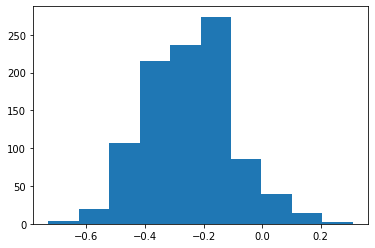

In [ ]:
plt.hist(pvalid)

In [ ]:
results_fn=Path('~/google-drive/experiments/results/results_colab.csv')

In [ ]:
df_results=pd.read_csv(results_fn)

In [ ]:
pd.options.display.max_columns=99
df_results.query('n_epochs==20 and max_lr==0.0001 and bs==1024')[['ds_id', 'unweighted_profit_0_value', 'unweighted_profit_05_1_value']]

,ds_id,unweighted_profit_0_value,unweighted_profit_05_1_value
73,bi_sample_anon_anon_10sl_4c_2d_2y_159999_184999_209999,0.187644,0.209945
76,bi_sample_anon_anon_10sl_4c_2d_2y_159999_184999_209999,0.188777,0.071309
77,bi_sample_anon_anon_10sl_4c_2d_2y_159999_184999_209999,-0.202366,-0.332641
210,bi_sample_pruned_anon_anon_10sl_4c_2d_1yhc_159999_184999_209999,0.131257,0.082852
211,bi_sample_pruned_anon_anon_10sl_4c_2d_1yhc_159999_184999_209999,0.033523,0.127963
212,bi_sample_pruned_anon_anon_10sl_4c_2d_1yhc_159999_184999_209999,0.052520,0.135382
213,bi_sample_pruned_anon_anon_10sl_4c_2d_1yhc_159999_184999_209999,0.131410,0.195731
214,bi_sample_pruned_anon_anon_10sl_4c_2d_1yhc_159999_184999_209999,0.409704,0.255737
215,bi_sample_pruned_anon_anon_10sl_4c_2d_1yhc_159999_184999_209999,0.273511,0.178677
276,bi_sample_pruned_anon_anon_10sl_4c_2d_4tc_4cat_2y_159999_184999_209999,0.138887,0.202758


In [ ]:
df_results.sort_values(by='unweighted_profit_0_value', ascending=False)['unweighted_profit_0_value']

265    38.174931
264    37.645660
187     0.487209
186     0.484186
188     0.482259
         ...    
162    -0.622656
160    -0.623165
161    -0.625286
1      -0.669014
5      -0.686323
Name: unweighted_profit_0_value, Length: 278, dtype: float64

In [ ]:
#df.query('name.str.contains("lu")', engine='python').head())
df_results.query('ds_id.str.contains("2y")', engine='python').sort_values(
    by='unweighted_profit_0_value', ascending=False)[[
    'unweighted_profit_0_value', 'unweighted_profit_05_1_value']].head(10)

,unweighted_profit_0_value,unweighted_profit_05_1_value
265,38.174931,38.206287
264,37.645660,37.490868
92,0.319396,0.311431
277,0.308818,0.239571
274,0.308227,0.192086
284,0.304340,0.199378
141,0.264022,0.161576
139,0.261059,0.128347
66,0.253396,0.051958
140,0.246049,0.091627


In [ ]:
df_results.query('ds_id=="bi_sample_anon_anon_10sl_4c_2d_2y_159999_184999_209999"')[[
    'ds_id', 'unweighted_profit_0_value', 'unweighted_profit_05_1_value', 'bs', 'wd', 'max_lr']].so

,ds_id,unweighted_profit_0_value,unweighted_profit_05_1_value,bs,wd,max_lr
66,bi_sample_anon_anon_10sl_4c_2d_2y_159999_184999_209999,0.253396,0.051958,256,0.03,0.00001
67,bi_sample_anon_anon_10sl_4c_2d_2y_159999_184999_209999,0.205323,0.051018,256,0.03,0.00001
68,bi_sample_anon_anon_10sl_4c_2d_2y_159999_184999_209999,0.072030,-0.003502,256,0.03,0.00001
69,bi_sample_anon_anon_10sl_4c_2d_2y_159999_184999_209999,0.150903,0.040793,256,0.03,0.00001
70,bi_sample_anon_anon_10sl_4c_2d_2y_159999_184999_209999,0.203661,0.031492,256,0.03,0.00001
...,...,...,...,...,...,...
140,bi_sample_anon_anon_10sl_4c_2d_2y_159999_184999_209999,0.246049,0.091627,2048,0.10,0.00030
141,bi_sample_anon_anon_10sl_4c_2d_2y_159999_184999_209999,0.264022,0.161576,2048,0.30,0.00030
142,bi_sample_anon_anon_10sl_4c_2d_2y_159999_184999_209999,-0.013732,-0.093345,2048,0.01,0.00030
143,bi_sample_anon_anon_10sl_4c_2d_2y_159999_184999_209999,-0.017379,-0.056343,2048,0.10,0.00030


In [ ]:
df_results.iloc[92]

arch                                                                    InceptionTimeD
n_epochs                                                                             5
max_lr                                                                          0.0003
wd                                                                                0.03
loss_fn_name                                                                leaky_loss
alpha                                                                              0.5
metric_0                                                             unweighted_profit
metric_1                                                          unweighted_profit_05
N                                                                                    4
magnitude                                                                          0.4
seed                                                                              1234
pct_start                                  

In [ ]:
df_results_fn

'results_exploration.csv'